<a href="https://colab.research.google.com/github/RAF96/ifmo-2019-deep-learning-coursework/blob/master/deligan%20with%20augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-benrca7s
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-benrca7s
  Created wheel for albumentations: filename=albumentations-0.4.4-cp36-none-any.whl size=61995 sha256=7966ed48f32a1ec0f9d8c9df03be5bb3ce878d892faf97e3209e968be9e5ed9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4lnxqjcv/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.4
    Uninstalling albumentations-0.4.4:
      Successfully uninstalled albumentations-0.4.4


In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
import albumentations
import albumentations.pytorch as ap
from torch.utils.data import Dataset
import os
from os.path import abspath, isfile, join
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def rgba2rgb(image):
    if image.shape[2] == 3:
        return None
        # return 1 - image
    alpha = image[:, :, 3]
    rgb = image[:, :, :3]
    black_spot = alpha == 0.0
    # rgb += black_spot.reshape(rgb.shape[0], rgb.shape[1], 1)
    return rgb

def read_images_content(*path):
    filepath = abspath(join(*path))
    files = [f for f in listdir(filepath) if isfile(join(filepath, f))]
    images = [rgba2rgb(plt.imread(join(filepath, f))) for f in files]
    images = list(filter(lambda x: x is not None ,images))
    # mages = [i[:, :, k] for i in images for k in [[0,1,2], [0,2,1], [1,0,2], [1,2,0], [2,0,1], [2,1,0]]]
    return images

IMG_SIZE = 64

# transform = albumentations.Compose([
#                                     # albumentations.MedianBlur(blur_limit=5),
#                                     albumentations.Resize(IMG_SIZE, IMG_SIZE),
#                                     albumentations.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                                     ap.ToTensor()
# ])

transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize((IMG_SIZE, IMG_SIZE)),
                                # transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(), 
                                # transforms.Normalize((0.5,), (0.5,))
                               ])

class PokemonDataset(Dataset):
    def __init__(self, *data_file, transform=None):
        self.data = read_images_content(*data_file)
        self.transform = transform

    def __getitem__(self, index: int) -> torch.Tensor:
        sample = self.data[index]
        if self.transform:
            # sample = self.transform(image=np.uint8(sample * 255))["image"]
            # sample = self.transform(np.uint8(sample * 255))
            with torch.no_grad():
                sample = (torch.clamp(self.transform(np.uint8(sample * 255)), 0, 1) - 0.5) * 2
        return sample.squeeze()

    def __len__(self):
        return len(self.data)
    
images_data = PokemonDataset("/content/pictures2", transform=transform)
len(images_data)

819

In [0]:
def show(images_data):
    ind = np.random.randint(1, high=len(images_data), size=25)
    pokemons = [images_data[i] for i in ind]
    fig, ax = plt.subplots(5, 5, sharex='col', sharey='row', figsize=(10,10))
    for i in range(5):
        for j in range(5):
            ax[i,j].imshow(tensor_to_img(pokemons[i * 5 + j]), cmap='gray')
            # ax[i,j].imshow(pokemons[i*5 + j], cmap='gray')
            ax[i,j].axis('off')

In [0]:
def cv2_to_tensor(x):
    return img_to_tensor(x)

def tensor_to_cv2(x):
    return tensor_to_img(x)

def cv2_to_img(x):
    return x

def img_to_cv2(x):
    return x

def tensor_to_img(x):
    with torch.no_grad():
        transpose = np.transpose(x, (1, 2, 0))
        return (transpose / 2 + 0.5).numpy()

def img_to_tensor(x):
    transpose = np.transpose(x, (2, 0, 1))
    return torch.tensor((transpose - 0.5) * 2, dtype=torch.float)

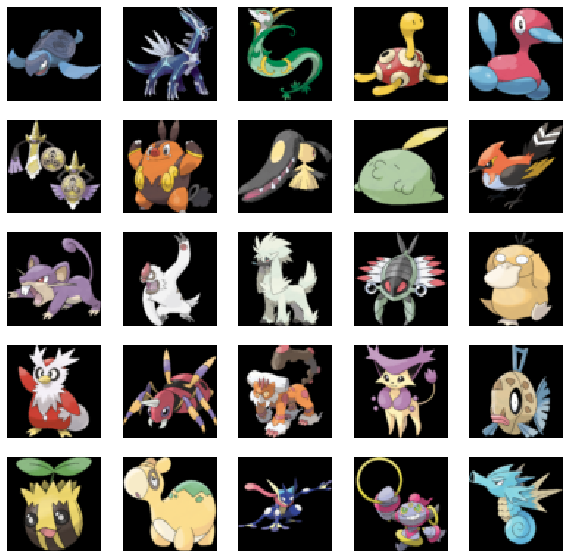

In [0]:
show(images_data)

In [0]:
def apply(arr, aug):
    return list(map(lambda x: img_to_tensor(aug.apply(tensor_to_img(x))), arr))

In [0]:
aug_dataset = []

from albumentations.augmentations.transforms import  *

list_transforms = [Blur,
 VerticalFlip,
 HorizontalFlip,
 Flip,
 # Normalize,
 Transpose,
 RandomCrop,
 #RandomGamma,
 #RandomRotate90,
 #Rotate,
 # ShiftScaleRotate,
 CenterCrop,
 OpticalDistortion,
 GridDistortion,
 #ElasticTransform,
 #RandomGridShuffle,
 #HueSaturationValue,
 #PadIfNeeded,
 #RGBShift,
 #RandomBrightness,
 #RandomContrast,
 MotionBlur,
 MedianBlur,
 GaussianBlur,
 GaussNoise,
 CLAHE,
 #ChannelShuffle,
 #InvertImg,
 ToGray,
 ToSepia,
 #JpegCompression,
 #ImageCompression,
 #Cutout,
 #CoarseDropout,
 #ToFloat,
 # FromFloat, // обучение улетает
 Crop,
 CropNonEmptyMaskIfExists,
 RandomScale,
 # ELongestMaxSize,
 #SmallestMaxSize,
 Resize,
 RandomSizedCrop,
 RandomResizedCrop,
 # RandomBrightnessContrast,
 # RandomCropNearBBox,
 RandomSizedBBoxSafeCrop,
 RandomSnow,
 RandomRain,
 # RandomFog,
 # RandomSunFlare,
 # RandomShadow,
 # Lambda,
 ChannelDropout,
 ISONoise,
 Solarize,
 Equalize,
 Posterize,
 Downscale,
 # MultiplicativeNoise,
 # MaskDropout
 ]

# list_transforms = [RandomRain]

cls_with_default_constructor = []

for index, cls in enumerate(list_transforms):
    try:
        cls()
        cls_with_default_constructor.append(cls)
    except:
        pass
print(len(cls_with_default_constructor))


for cls in cls_with_default_constructor:
    print(f"start {cls.__name__}")
    try:
        aug_dataset += apply(images_data, cls())
    except:
        pass
        # print(f"error: {cls.__name__}")
   

24
start Blur
start VerticalFlip
start HorizontalFlip
start Flip
start Transpose
start OpticalDistortion
start GridDistortion
start MotionBlur
start MedianBlur
start GaussianBlur
start GaussNoise
start CLAHE
start ToGray
start ToSepia
start Crop
start RandomScale
start RandomSnow
start RandomRain
start ChannelDropout
start ISONoise
start Solarize
start Equalize
start Posterize
start Downscale


In [0]:
# substitution of images data for augmentations data
aug_dataset += images_data
images_data =  aug_dataset
import random
random.shuffle(aug_dataset)
len(images_data)

12285

In [0]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.n_ditsributions = 150
        self.n_features = 200
        self.offset = (torch.range(0, self.n_features - 1) * self.n_ditsributions).type(torch.long)
        mu = 2 * torch.rand(self.n_ditsributions * self.n_features) - 1
        mu.requires_grad = True
        self.mu = nn.Parameter(mu)
        sigma = 0.2 * torch.ones(self.n_ditsributions * self.n_features)
        sigma.requires_grad = True
        self.sigma = nn.Parameter(sigma)

        self.conv = nn.Sequential(
            nn.ConvTranspose2d(in_channels=self.n_features, out_channels=512, kernel_size=4, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),
            
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.ConvTranspose2d(in_channels=64, out_channels=3, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, input):
        idx = torch.randint(0, self.n_ditsributions, input.size()) + self.offset
        input = input * self.sigma[idx] + self.mu[idx]
        input = input.view(-1, self.n_features, 1, 1)
        input = self.conv(input)
        return input


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.2, inplace=True)
        )

        # self.fc_net = nn.Sequential(
        #     nn.Linear(8192, 1),
        #     nn.Sigmoid()
        # )
        self.fc_net = nn.Sequential(
            nn.Linear(8192, 1)
        )

    def forward(self, input):
      # input = input.view(input.size(0), 1, IMG_SIZE, IMG_SIZE)
      input = self.conv(input)
      input = input.view(input.size(0), -1)
      input = self.fc_net(input)
      return input

In [0]:
def noise(size, n_features=200):
    eps = torch.normal(0, 1, (size, n_features))
    if torch.cuda.is_available():
        return eps.cuda()
    return eps

def ones_tensor(size):
    t = torch.ones(size, 1) - 0.2
    if torch.cuda.is_available():
        return t.cuda()
    return t

def zeros_tensor(size):
    t = torch.zeros(size, 1) + 0.2
    if torch.cuda.is_available():
        return t.cuda()
    return t

In [0]:
discriminator = Discriminator()
generator = Generator()

n_critic = 1
clamp = 0.01

if torch.cuda.is_available():
    discriminator.cuda()
    generator.cuda()

d_optim = optim.RMSprop(discriminator.parameters(), lr=0.0001)
g_optim = optim.RMSprop(generator.parameters(), lr=0.0001)

# d_optim = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))
# g_optim = optim.Adam(generator.parameters(), lr=0.0001, betas=(0.5, 0.999))

loss_function = nn.BCELoss()

def discriminator_step(optimizer, loss_function, true_data, fake_data):
    for _ in range(n_critic):
        optimizer.zero_grad()
        # output_true = discriminator(true_data)
        # loss_true = loss_function(output_true, ones_tensor(true_data.size(0)))
        loss_true = - discriminator(true_data).mean()
        loss_true.backward()

        # output_fake = discriminator(fake_data)
        # loss_fake = loss_function(output_fake, zeros_tensor(fake_data.size(0)))
        loss_fake = discriminator(fake_data).mean()
        loss_fake.backward()

        optimizer.step()
        for p in discriminator.parameters():
            p.data.clamp_(-clamp, clamp)

    return -(loss_true + loss_fake)

def generator_step(optimizer, loss_function, fake_data):
    optimizer.zero_grad()
    # output = discriminator(fake_data)
    # loss = loss_function(output, ones_tensor(output.size(0)))
    loss = - discriminator(fake_data).mean()
    # loss.backward()
    (loss + 0.001 * torch.mean(torch.pow(1-generator.sigma, 2))).backward()
    optimizer.step()
    return - loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  


In [0]:
def train_gan(loss_function, num_epochs=100):
    d_losses = []
    g_losses = []
    import tqdm
    for epoch in tqdm.tqdm(range(num_epochs)):
        print(f'\r epoch: [{epoch+1}/{num_epochs}]', end='')
        for true_batch in dataloader:
            true_data = true_batch
            if torch.cuda.is_available():
                true_data = true_data.cuda()
            fake_data = generator(noise(true_data.size(0))).detach()
            discriminator_loss = discriminator_step(d_optim, loss_function, true_data, fake_data)
            fake_data = generator(noise(true_batch.size(0)))
            generator_loss = generator_step(g_optim, loss_function, fake_data)
            print(f'\r epoch: [{epoch+1}/{num_epochs}], discriminator: {discriminator_loss.data}, generator: {generator_loss.data}', end='')
        d_losses.append(float(discriminator_loss.data.cpu()))
        g_losses.append(float(generator_loss.data.cpu()))
    return d_losses, g_losses

In [0]:
num_epochs = 500
batch_size = 64
dataloader = torch.utils.data.DataLoader(images_data, batch_size=batch_size, shuffle=True)
num_batches = len(dataloader)

d_losses, g_losses = train_gan(loss_function, num_epochs)

  0%|          | 0/500 [00:00<?, ?it/s]

 epoch: [1/500], discriminator: 0.011867323890328407, generator: -0.03806255757808685

  0%|          | 1/500 [00:13<1:49:00, 13.11s/it]

 epoch: [2/500], discriminator: 0.08981378376483917, generator: -0.12172358483076096

  0%|          | 2/500 [00:26<1:48:29, 13.07s/it]

 epoch: [3/500], discriminator: 0.2182072401046753, generator: 0.08931595832109451

  1%|          | 3/500 [00:39<1:48:04, 13.05s/it]

 epoch: [4/500], discriminator: 0.3364691734313965, generator: 0.04114896059036255

  1%|          | 4/500 [00:52<1:47:34, 13.01s/it]

 epoch: [5/500], discriminator: 0.14909961819648743, generator: -0.4158467948436737

  1%|          | 5/500 [01:05<1:47:24, 13.02s/it]

 epoch: [6/500], discriminator: 0.15957923233509064, generator: -0.40693897008895874

  1%|          | 6/500 [01:18<1:47:07, 13.01s/it]

 epoch: [7/500], discriminator: 0.12821218371391296, generator: -0.2129960060119629

  1%|▏         | 7/500 [01:31<1:46:53, 13.01s/it]

 epoch: [8/500], discriminator: 0.029609739780426025, generator: 0.3383094072341919

  2%|▏         | 8/500 [01:44<1:46:33, 13.00s/it]

 epoch: [9/500], discriminator: 0.2756583094596863, generator: 0.1401226967573166

  2%|▏         | 9/500 [01:56<1:46:16, 12.99s/it]

 epoch: [10/500], discriminator: 0.10588103532791138, generator: -0.37207484245300293

  2%|▏         | 10/500 [02:09<1:45:58, 12.98s/it]

 epoch: [11/500], discriminator: 0.3008793890476227, generator: 0.22798193991184235

  2%|▏         | 11/500 [02:22<1:45:40, 12.97s/it]

 epoch: [12/500], discriminator: 0.22978642582893372, generator: -0.5126086473464966

  2%|▏         | 12/500 [02:35<1:45:27, 12.97s/it]

 epoch: [13/500], discriminator: 0.2827320694923401, generator: -0.5200915336608887

  3%|▎         | 13/500 [02:48<1:45:16, 12.97s/it]

 epoch: [14/500], discriminator: 0.18760141730308533, generator: -0.3943313956260681

  3%|▎         | 14/500 [03:01<1:45:05, 12.97s/it]

 epoch: [15/500], discriminator: 0.1482313871383667, generator: 0.013292621821165085

  3%|▎         | 15/500 [03:14<1:44:52, 12.97s/it]

 epoch: [16/500], discriminator: 0.3220980167388916, generator: 0.2979591488838196

  3%|▎         | 16/500 [03:27<1:44:44, 12.98s/it]

 epoch: [17/500], discriminator: 0.24214337766170502, generator: -0.4024193286895752

  3%|▎         | 17/500 [03:40<1:44:29, 12.98s/it]

 epoch: [18/500], discriminator: 0.14651522040367126, generator: -0.34628039598464966

  4%|▎         | 18/500 [03:53<1:44:16, 12.98s/it]

 epoch: [19/500], discriminator: 0.16751879453659058, generator: -0.331790030002594

  4%|▍         | 19/500 [04:06<1:44:03, 12.98s/it]

 epoch: [20/500], discriminator: 0.40876686573028564, generator: -0.4026378393173218

  4%|▍         | 20/500 [04:19<1:43:47, 12.97s/it]

 epoch: [21/500], discriminator: 0.281536728143692, generator: -0.45903995633125305

  4%|▍         | 21/500 [04:32<1:43:31, 12.97s/it]

 epoch: [22/500], discriminator: 0.24978673458099365, generator: -0.501652717590332

  4%|▍         | 22/500 [04:45<1:43:22, 12.98s/it]

 epoch: [23/500], discriminator: 0.09492766857147217, generator: -0.20750932395458221

  5%|▍         | 23/500 [04:58<1:43:05, 12.97s/it]

 epoch: [24/500], discriminator: 0.31129080057144165, generator: 0.12273022532463074

  5%|▍         | 24/500 [05:11<1:42:53, 12.97s/it]

 epoch: [25/500], discriminator: 0.26834502816200256, generator: -0.4836532473564148

  5%|▌         | 25/500 [05:24<1:42:36, 12.96s/it]

 epoch: [26/500], discriminator: 0.26306307315826416, generator: 0.015649018809199333

  5%|▌         | 26/500 [05:37<1:42:21, 12.96s/it]

 epoch: [27/500], discriminator: 0.14760315418243408, generator: -0.2547130882740021

  5%|▌         | 27/500 [05:50<1:42:08, 12.96s/it]

 epoch: [28/500], discriminator: 0.27706125378608704, generator: 0.12080485373735428

  6%|▌         | 28/500 [06:03<1:41:56, 12.96s/it]

 epoch: [29/500], discriminator: 0.19851996004581451, generator: -0.3893137276172638

  6%|▌         | 29/500 [06:16<1:41:45, 12.96s/it]

 epoch: [30/500], discriminator: 0.20606985688209534, generator: -0.41794583201408386

  6%|▌         | 30/500 [06:29<1:41:36, 12.97s/it]

 epoch: [31/500], discriminator: 0.23573601245880127, generator: -0.46218323707580566

  6%|▌         | 31/500 [06:42<1:41:24, 12.97s/it]

 epoch: [32/500], discriminator: 0.21546068787574768, generator: -0.5357146263122559

  6%|▋         | 32/500 [06:55<1:41:15, 12.98s/it]

 epoch: [33/500], discriminator: 0.30481263995170593, generator: 0.2286018580198288

  7%|▋         | 33/500 [07:08<1:40:59, 12.98s/it]

 epoch: [34/500], discriminator: 0.2970081865787506, generator: 0.09670629352331161

  7%|▋         | 34/500 [07:21<1:40:48, 12.98s/it]

 epoch: [35/500], discriminator: 0.32947415113449097, generator: -0.43993526697158813

  7%|▋         | 35/500 [07:34<1:40:36, 12.98s/it]

 epoch: [36/500], discriminator: 0.3006627559661865, generator: -0.4948212802410126

  7%|▋         | 36/500 [07:47<1:40:25, 12.99s/it]

 epoch: [37/500], discriminator: 0.30547672510147095, generator: -0.19313201308250427

  7%|▋         | 37/500 [08:00<1:40:09, 12.98s/it]

 epoch: [38/500], discriminator: 0.3071020245552063, generator: 0.20282137393951416

  8%|▊         | 38/500 [08:13<1:39:52, 12.97s/it]

 epoch: [39/500], discriminator: 0.3391486406326294, generator: 0.09024207293987274

  8%|▊         | 39/500 [08:26<1:39:37, 12.97s/it]

 epoch: [40/500], discriminator: 0.2940906286239624, generator: 0.0628582090139389

  8%|▊         | 40/500 [08:39<1:39:24, 12.97s/it]

 epoch: [41/500], discriminator: 0.34671133756637573, generator: 0.26097455620765686

  8%|▊         | 41/500 [08:52<1:39:10, 12.96s/it]

 epoch: [42/500], discriminator: 0.21862341463565826, generator: -0.01770869642496109

  8%|▊         | 42/500 [09:04<1:38:54, 12.96s/it]

 epoch: [43/500], discriminator: 0.2994164824485779, generator: -0.34440070390701294

  9%|▊         | 43/500 [09:17<1:38:43, 12.96s/it]

 epoch: [44/500], discriminator: 0.24857738614082336, generator: -0.2526947259902954

  9%|▉         | 44/500 [09:30<1:38:33, 12.97s/it]

 epoch: [45/500], discriminator: 0.1414329558610916, generator: -0.23190060257911682

  9%|▉         | 45/500 [09:43<1:38:14, 12.96s/it]

 epoch: [46/500], discriminator: 0.2947571277618408, generator: -0.4306996464729309

  9%|▉         | 46/500 [09:56<1:38:01, 12.96s/it]

 epoch: [47/500], discriminator: 0.4138902723789215, generator: -0.2557036280632019

  9%|▉         | 47/500 [10:09<1:37:50, 12.96s/it]

 epoch: [48/500], discriminator: 0.20932956039905548, generator: -0.416375994682312

 10%|▉         | 48/500 [10:22<1:37:32, 12.95s/it]

 epoch: [49/500], discriminator: 0.25180256366729736, generator: 0.023356495425105095

 10%|▉         | 49/500 [10:35<1:37:21, 12.95s/it]

 epoch: [50/500], discriminator: 0.31343019008636475, generator: 0.09956596791744232

 10%|█         | 50/500 [10:48<1:37:07, 12.95s/it]

 epoch: [51/500], discriminator: 0.2052675038576126, generator: -0.06097707524895668

 10%|█         | 51/500 [11:01<1:36:54, 12.95s/it]

 epoch: [52/500], discriminator: 0.268494576215744, generator: -0.4476487636566162

 10%|█         | 52/500 [11:14<1:36:42, 12.95s/it]

 epoch: [53/500], discriminator: 0.25112318992614746, generator: 0.21210160851478577

 11%|█         | 53/500 [11:27<1:36:31, 12.96s/it]

 epoch: [54/500], discriminator: 0.19826379418373108, generator: 0.09326542168855667

 11%|█         | 54/500 [11:40<1:36:15, 12.95s/it]

 epoch: [55/500], discriminator: 0.2958155572414398, generator: -0.3401901125907898

 11%|█         | 55/500 [11:53<1:36:00, 12.94s/it]

 epoch: [56/500], discriminator: 0.3070961534976959, generator: 0.029769964516162872

 11%|█         | 56/500 [12:06<1:35:47, 12.94s/it]

 epoch: [57/500], discriminator: 0.2421901673078537, generator: -0.18660277128219604

 11%|█▏        | 57/500 [12:19<1:35:31, 12.94s/it]

 epoch: [58/500], discriminator: 0.26998963952064514, generator: -0.03292066976428032

 12%|█▏        | 58/500 [12:32<1:35:20, 12.94s/it]

 epoch: [59/500], discriminator: 0.32169920206069946, generator: -0.18424254655838013

 12%|█▏        | 59/500 [12:45<1:35:10, 12.95s/it]

 epoch: [60/500], discriminator: 0.2569456100463867, generator: -0.14327609539031982

 12%|█▏        | 60/500 [12:58<1:34:55, 12.95s/it]

 epoch: [61/500], discriminator: 0.2974863052368164, generator: -0.31250256299972534

 12%|█▏        | 61/500 [13:11<1:34:45, 12.95s/it]

 epoch: [62/500], discriminator: 0.3147760033607483, generator: -0.4488244652748108

 12%|█▏        | 62/500 [13:23<1:34:33, 12.95s/it]

 epoch: [63/500], discriminator: 0.30698829889297485, generator: -0.49452871084213257

 13%|█▎        | 63/500 [13:36<1:34:19, 12.95s/it]

 epoch: [64/500], discriminator: 0.13827499747276306, generator: -0.3085331916809082

 13%|█▎        | 64/500 [13:49<1:34:08, 12.95s/it]

 epoch: [65/500], discriminator: 0.14521130919456482, generator: 0.10549818724393845

 13%|█▎        | 65/500 [14:02<1:33:52, 12.95s/it]

 epoch: [66/500], discriminator: 0.3020753562450409, generator: -0.4920758605003357

 13%|█▎        | 66/500 [14:15<1:33:40, 12.95s/it]

 epoch: [67/500], discriminator: 0.17340236902236938, generator: -0.28967541456222534

 13%|█▎        | 67/500 [14:28<1:33:30, 12.96s/it]

 epoch: [68/500], discriminator: 0.2614305019378662, generator: -0.14386707544326782

 14%|█▎        | 68/500 [14:41<1:33:19, 12.96s/it]

 epoch: [69/500], discriminator: 0.22338958084583282, generator: -0.44870132207870483

 14%|█▍        | 69/500 [14:54<1:33:04, 12.96s/it]

 epoch: [70/500], discriminator: 0.34595948457717896, generator: -0.13208803534507751

 14%|█▍        | 70/500 [15:07<1:32:53, 12.96s/it]

 epoch: [71/500], discriminator: 0.3267227113246918, generator: -0.020999012514948845

 14%|█▍        | 71/500 [15:20<1:32:39, 12.96s/it]

 epoch: [72/500], discriminator: 0.24715454876422882, generator: 0.08369551599025726

 14%|█▍        | 72/500 [15:33<1:32:25, 12.96s/it]

 epoch: [73/500], discriminator: 0.23309683799743652, generator: 0.16099819540977478

 15%|█▍        | 73/500 [15:46<1:32:16, 12.97s/it]

 epoch: [74/500], discriminator: 0.17978724837303162, generator: -0.32577717304229736

 15%|█▍        | 74/500 [15:59<1:32:04, 12.97s/it]

 epoch: [75/500], discriminator: 0.23550552129745483, generator: 0.07576348632574081

 15%|█▌        | 75/500 [16:12<1:31:51, 12.97s/it]

 epoch: [76/500], discriminator: 0.25577104091644287, generator: 0.05616956204175949

 15%|█▌        | 76/500 [16:25<1:31:33, 12.96s/it]

 epoch: [77/500], discriminator: 0.24320414662361145, generator: -0.24961109459400177

 15%|█▌        | 77/500 [16:38<1:31:22, 12.96s/it]

 epoch: [78/500], discriminator: 0.21961380541324615, generator: -0.3312394618988037

 16%|█▌        | 78/500 [16:51<1:31:03, 12.95s/it]

 epoch: [79/500], discriminator: 0.1978309154510498, generator: -0.3835456073284149

 16%|█▌        | 79/500 [17:04<1:30:52, 12.95s/it]

 epoch: [80/500], discriminator: 0.22355470061302185, generator: 0.27374380826950073

 16%|█▌        | 80/500 [17:17<1:30:37, 12.95s/it]

 epoch: [81/500], discriminator: 0.1944737732410431, generator: -0.3499401807785034

 16%|█▌        | 81/500 [17:30<1:30:23, 12.94s/it]

 epoch: [82/500], discriminator: 0.18456336855888367, generator: -0.40676403045654297

 16%|█▋        | 82/500 [17:43<1:30:10, 12.94s/it]

 epoch: [83/500], discriminator: 0.32278716564178467, generator: -0.12828278541564941

 17%|█▋        | 83/500 [17:56<1:29:59, 12.95s/it]

 epoch: [84/500], discriminator: 0.2771736979484558, generator: -0.26651450991630554

 17%|█▋        | 84/500 [18:08<1:29:45, 12.95s/it]

 epoch: [85/500], discriminator: 0.24318534135818481, generator: -0.002895837649703026

 17%|█▋        | 85/500 [18:21<1:29:30, 12.94s/it]

 epoch: [86/500], discriminator: 0.2607935667037964, generator: -0.2931664288043976

 17%|█▋        | 86/500 [18:34<1:29:17, 12.94s/it]

 epoch: [87/500], discriminator: 0.3398094177246094, generator: -0.20598268508911133

 17%|█▋        | 87/500 [18:47<1:29:07, 12.95s/it]

 epoch: [88/500], discriminator: 0.2383216917514801, generator: 0.13532941043376923

 18%|█▊        | 88/500 [19:00<1:28:55, 12.95s/it]

 epoch: [89/500], discriminator: 0.2368031144142151, generator: -0.05497666075825691

 18%|█▊        | 89/500 [19:13<1:28:44, 12.95s/it]

 epoch: [90/500], discriminator: 0.20332521200180054, generator: -0.28470927476882935

 18%|█▊        | 90/500 [19:26<1:28:32, 12.96s/it]

 epoch: [91/500], discriminator: 0.20249205827713013, generator: -0.29960331320762634

 18%|█▊        | 91/500 [19:39<1:28:20, 12.96s/it]

 epoch: [92/500], discriminator: 0.24615497887134552, generator: -0.08185221999883652

 18%|█▊        | 92/500 [19:52<1:28:08, 12.96s/it]

 epoch: [93/500], discriminator: 0.23530957102775574, generator: 0.07477928698062897

 19%|█▊        | 93/500 [20:05<1:27:51, 12.95s/it]

 epoch: [94/500], discriminator: 0.19777505099773407, generator: -0.3495140075683594

 19%|█▉        | 94/500 [20:18<1:27:36, 12.95s/it]

 epoch: [95/500], discriminator: 0.25373077392578125, generator: -0.36784064769744873

 19%|█▉        | 95/500 [20:31<1:27:29, 12.96s/it]

 epoch: [96/500], discriminator: 0.2236419916152954, generator: -0.36763519048690796

 19%|█▉        | 96/500 [20:44<1:27:13, 12.96s/it]

 epoch: [97/500], discriminator: 0.24789799749851227, generator: 0.08556587994098663

 19%|█▉        | 97/500 [20:57<1:26:59, 12.95s/it]

 epoch: [98/500], discriminator: 0.2201399803161621, generator: 0.03944409638643265

 20%|█▉        | 98/500 [21:10<1:26:46, 12.95s/it]

 epoch: [99/500], discriminator: 0.26714298129081726, generator: -0.31745830178260803

 20%|█▉        | 99/500 [21:23<1:26:31, 12.95s/it]

 epoch: [100/500], discriminator: 0.18773888051509857, generator: -0.317289263010025

 20%|██        | 100/500 [21:36<1:26:17, 12.94s/it]

 epoch: [101/500], discriminator: 0.24128061532974243, generator: -0.4321244955062866

 20%|██        | 101/500 [21:49<1:26:14, 12.97s/it]

 epoch: [102/500], discriminator: 0.241911381483078, generator: 0.12553086876869202

 20%|██        | 102/500 [22:02<1:25:58, 12.96s/it]

 epoch: [103/500], discriminator: 0.21042443811893463, generator: -0.3816481828689575

 21%|██        | 103/500 [22:15<1:25:43, 12.96s/it]

 epoch: [104/500], discriminator: 0.31674909591674805, generator: 0.01168992929160595

 21%|██        | 104/500 [22:28<1:25:29, 12.95s/it]

 epoch: [105/500], discriminator: 0.2842959463596344, generator: -0.25086063146591187

 21%|██        | 105/500 [22:41<1:25:17, 12.96s/it]

 epoch: [106/500], discriminator: 0.21337087452411652, generator: -0.2712590992450714

 21%|██        | 106/500 [22:53<1:25:06, 12.96s/it]

 epoch: [107/500], discriminator: 0.21208180487155914, generator: -0.1552918404340744

 21%|██▏       | 107/500 [23:06<1:24:52, 12.96s/it]

 epoch: [108/500], discriminator: 0.22697481513023376, generator: 0.0773232951760292

 22%|██▏       | 108/500 [23:19<1:24:43, 12.97s/it]

 epoch: [109/500], discriminator: 0.2395443320274353, generator: 0.004119087476283312

 22%|██▏       | 109/500 [23:32<1:24:32, 12.97s/it]

 epoch: [110/500], discriminator: 0.2761514186859131, generator: 0.12009622156620026

 22%|██▏       | 110/500 [23:45<1:24:17, 12.97s/it]

 epoch: [111/500], discriminator: 0.18341141939163208, generator: -0.3319559693336487

 22%|██▏       | 111/500 [23:58<1:24:03, 12.97s/it]

 epoch: [112/500], discriminator: 0.27651530504226685, generator: -0.3251187205314636

 22%|██▏       | 112/500 [24:11<1:23:47, 12.96s/it]

 epoch: [113/500], discriminator: 0.3028750419616699, generator: -0.26449960470199585

 23%|██▎       | 113/500 [24:24<1:23:36, 12.96s/it]

 epoch: [114/500], discriminator: 0.28262752294540405, generator: 0.13167661428451538

 23%|██▎       | 114/500 [24:37<1:23:27, 12.97s/it]

 epoch: [115/500], discriminator: 0.25997090339660645, generator: -0.3688454031944275

 23%|██▎       | 115/500 [24:50<1:23:11, 12.97s/it]

 epoch: [116/500], discriminator: 0.2855982780456543, generator: -0.3142828941345215

 23%|██▎       | 116/500 [25:03<1:22:59, 12.97s/it]

 epoch: [117/500], discriminator: 0.19654595851898193, generator: -0.22249150276184082

 23%|██▎       | 117/500 [25:16<1:22:47, 12.97s/it]

 epoch: [118/500], discriminator: 0.27365267276763916, generator: -0.16408738493919373

 24%|██▎       | 118/500 [25:29<1:22:36, 12.98s/it]

 epoch: [119/500], discriminator: 0.2283501923084259, generator: 0.045977771282196045

 24%|██▍       | 119/500 [25:42<1:22:21, 12.97s/it]

 epoch: [120/500], discriminator: 0.17883281409740448, generator: -0.2753591537475586

 24%|██▍       | 120/500 [25:55<1:22:06, 12.97s/it]

 epoch: [121/500], discriminator: 0.3006625175476074, generator: -0.20561262965202332

 24%|██▍       | 121/500 [26:08<1:21:53, 12.96s/it]

 epoch: [122/500], discriminator: 0.1952921450138092, generator: 0.010621723718941212

 24%|██▍       | 122/500 [26:21<1:21:38, 12.96s/it]

 epoch: [123/500], discriminator: 0.22765596210956573, generator: 0.009293238632380962

 25%|██▍       | 123/500 [26:34<1:21:26, 12.96s/it]

 epoch: [124/500], discriminator: 0.2856788635253906, generator: -0.034927427768707275

 25%|██▍       | 124/500 [26:47<1:21:15, 12.97s/it]

 epoch: [125/500], discriminator: 0.2168487310409546, generator: 0.04454585909843445

 25%|██▌       | 125/500 [27:00<1:21:08, 12.98s/it]

 epoch: [126/500], discriminator: 0.25251534581184387, generator: -0.3815551996231079

 25%|██▌       | 126/500 [27:13<1:20:54, 12.98s/it]

 epoch: [127/500], discriminator: 0.30627432465553284, generator: -0.43267297744750977

 25%|██▌       | 127/500 [27:26<1:20:39, 12.97s/it]

 epoch: [128/500], discriminator: 0.29876431822776794, generator: -0.06924489885568619

 26%|██▌       | 128/500 [27:39<1:20:25, 12.97s/it]

 epoch: [129/500], discriminator: 0.21668536961078644, generator: -0.3473617434501648

 26%|██▌       | 129/500 [27:52<1:20:11, 12.97s/it]

 epoch: [130/500], discriminator: 0.2427610158920288, generator: -0.3211034834384918

 26%|██▌       | 130/500 [28:05<1:19:58, 12.97s/it]

 epoch: [131/500], discriminator: 0.21067100763320923, generator: -0.36935117840766907

 26%|██▌       | 131/500 [28:18<1:19:44, 12.97s/it]

 epoch: [132/500], discriminator: 0.23497632145881653, generator: -0.35967281460762024

 26%|██▋       | 132/500 [28:31<1:19:31, 12.97s/it]

 epoch: [133/500], discriminator: 0.24992170929908752, generator: -0.062271155416965485

 27%|██▋       | 133/500 [28:44<1:19:18, 12.97s/it]

 epoch: [134/500], discriminator: 0.24546825885772705, generator: -0.02396158128976822

 27%|██▋       | 134/500 [28:57<1:19:09, 12.98s/it]

 epoch: [135/500], discriminator: 0.21821095049381256, generator: -0.3205634355545044

 27%|██▋       | 135/500 [29:10<1:18:56, 12.98s/it]

 epoch: [136/500], discriminator: 0.2709093391895294, generator: -0.19438134133815765

 27%|██▋       | 136/500 [29:23<1:18:42, 12.98s/it]

 epoch: [137/500], discriminator: 0.20654629170894623, generator: -0.1429004967212677

 27%|██▋       | 137/500 [29:36<1:18:30, 12.98s/it]

 epoch: [138/500], discriminator: 0.2661508321762085, generator: -0.2911273241043091

 28%|██▊       | 138/500 [29:49<1:18:17, 12.98s/it]

 epoch: [139/500], discriminator: 0.3084791302680969, generator: -0.2900300621986389

 28%|██▊       | 139/500 [30:02<1:18:05, 12.98s/it]

 epoch: [140/500], discriminator: 0.24286915361881256, generator: 0.05045716091990471

 28%|██▊       | 140/500 [30:14<1:17:48, 12.97s/it]

 epoch: [141/500], discriminator: 0.27552032470703125, generator: 0.012592664919793606

 28%|██▊       | 141/500 [30:27<1:17:29, 12.95s/it]

 epoch: [142/500], discriminator: 0.26347190141677856, generator: -0.33400148153305054

 28%|██▊       | 142/500 [30:40<1:17:12, 12.94s/it]

 epoch: [143/500], discriminator: 0.27004343271255493, generator: -0.0056999074295163155

 29%|██▊       | 143/500 [30:54<1:17:50, 13.08s/it]

 epoch: [144/500], discriminator: 0.24243251979351044, generator: -0.012980821542441845

 29%|██▉       | 144/500 [31:07<1:17:30, 13.06s/it]

 epoch: [145/500], discriminator: 0.3092399537563324, generator: -0.2643779516220093

 29%|██▉       | 145/500 [31:20<1:17:11, 13.05s/it]

 epoch: [146/500], discriminator: 0.2694389522075653, generator: -0.314355731010437

 29%|██▉       | 146/500 [31:33<1:16:58, 13.05s/it]

 epoch: [147/500], discriminator: 0.26300716400146484, generator: -0.045780427753925323

 29%|██▉       | 147/500 [31:46<1:16:45, 13.05s/it]

 epoch: [148/500], discriminator: 0.2695091962814331, generator: -0.04145844280719757

 30%|██▉       | 148/500 [31:59<1:16:31, 13.04s/it]

 epoch: [149/500], discriminator: 0.2383616715669632, generator: -0.2821647822856903

 30%|██▉       | 149/500 [32:12<1:16:17, 13.04s/it]

 epoch: [150/500], discriminator: 0.25647661089897156, generator: -0.05787009000778198

 30%|███       | 150/500 [32:25<1:16:04, 13.04s/it]

 epoch: [151/500], discriminator: 0.27195507287979126, generator: -0.03648615628480911

 30%|███       | 151/500 [32:38<1:15:51, 13.04s/it]

 epoch: [152/500], discriminator: 0.2725008428096771, generator: -0.3340228796005249

 30%|███       | 152/500 [32:51<1:15:37, 13.04s/it]

 epoch: [153/500], discriminator: 0.23857548832893372, generator: -0.2686750888824463

 31%|███       | 153/500 [33:04<1:15:22, 13.03s/it]

 epoch: [154/500], discriminator: 0.221125528216362, generator: -0.2243884652853012

 31%|███       | 154/500 [33:17<1:15:07, 13.03s/it]

 epoch: [155/500], discriminator: 0.2712253928184509, generator: -0.3337927758693695

 31%|███       | 155/500 [33:30<1:14:54, 13.03s/it]

 epoch: [156/500], discriminator: 0.29047441482543945, generator: -0.317938894033432

 31%|███       | 156/500 [33:43<1:14:39, 13.02s/it]

 epoch: [157/500], discriminator: 0.23070257902145386, generator: -0.007751195691525936

 31%|███▏      | 157/500 [33:56<1:14:30, 13.03s/it]

 epoch: [158/500], discriminator: 0.28177815675735474, generator: -0.20696955919265747

 32%|███▏      | 158/500 [34:09<1:14:16, 13.03s/it]

 epoch: [159/500], discriminator: 0.2639467120170593, generator: -0.09911657869815826

 32%|███▏      | 159/500 [34:22<1:13:58, 13.02s/it]

 epoch: [160/500], discriminator: 0.22931049764156342, generator: -0.02786516584455967

 32%|███▏      | 160/500 [34:35<1:13:45, 13.02s/it]

 epoch: [161/500], discriminator: 0.2540963590145111, generator: 0.04070166498422623

 32%|███▏      | 161/500 [34:48<1:13:33, 13.02s/it]

 epoch: [162/500], discriminator: 0.22621530294418335, generator: -0.3335275948047638

 32%|███▏      | 162/500 [35:01<1:13:16, 13.01s/it]

 epoch: [163/500], discriminator: 0.26938655972480774, generator: -0.08769059181213379

 33%|███▎      | 163/500 [35:14<1:13:01, 13.00s/it]

 epoch: [164/500], discriminator: 0.25201523303985596, generator: -0.34319961071014404

 33%|███▎      | 164/500 [35:27<1:12:54, 13.02s/it]

 epoch: [165/500], discriminator: 0.2546652853488922, generator: -0.32583364844322205

 33%|███▎      | 165/500 [35:40<1:12:39, 13.01s/it]

 epoch: [166/500], discriminator: 0.22326061129570007, generator: -0.30510833859443665

 33%|███▎      | 166/500 [35:53<1:12:21, 13.00s/it]

 epoch: [167/500], discriminator: 0.23637531697750092, generator: -0.38724255561828613

 33%|███▎      | 167/500 [36:06<1:12:10, 13.00s/it]

 epoch: [168/500], discriminator: 0.27500686049461365, generator: -0.027542656287550926

 34%|███▎      | 168/500 [36:19<1:11:53, 12.99s/it]

 epoch: [169/500], discriminator: 0.23081918060779572, generator: -0.2230619341135025

 34%|███▍      | 169/500 [36:32<1:11:37, 12.98s/it]

 epoch: [170/500], discriminator: 0.26770636439323425, generator: -0.23318704962730408

 34%|███▍      | 170/500 [36:45<1:11:29, 13.00s/it]

 epoch: [171/500], discriminator: 0.27258503437042236, generator: -0.07769930362701416

 34%|███▍      | 171/500 [36:58<1:11:19, 13.01s/it]

 epoch: [172/500], discriminator: 0.23982125520706177, generator: -0.3495875597000122

 34%|███▍      | 172/500 [37:11<1:11:19, 13.05s/it]

 epoch: [173/500], discriminator: 0.2284388691186905, generator: -0.15334372222423553

 35%|███▍      | 173/500 [37:25<1:11:51, 13.18s/it]

 epoch: [174/500], discriminator: 0.18158796429634094, generator: -0.3574807643890381

 35%|███▍      | 174/500 [37:38<1:11:27, 13.15s/it]

 epoch: [175/500], discriminator: 0.23761019110679626, generator: -0.38942715525627136

 35%|███▌      | 175/500 [37:51<1:11:04, 13.12s/it]

 epoch: [176/500], discriminator: 0.26783260703086853, generator: -0.15527844429016113

 35%|███▌      | 176/500 [38:04<1:10:43, 13.10s/it]

 epoch: [177/500], discriminator: 0.2829320728778839, generator: -0.09527295082807541

 35%|███▌      | 177/500 [38:17<1:10:20, 13.07s/it]

 epoch: [178/500], discriminator: 0.29416170716285706, generator: -0.16865554451942444

 36%|███▌      | 178/500 [38:30<1:10:01, 13.05s/it]

 epoch: [179/500], discriminator: 0.29399973154067993, generator: 0.017029915004968643

 36%|███▌      | 179/500 [38:43<1:09:46, 13.04s/it]

 epoch: [180/500], discriminator: 0.25824129581451416, generator: -0.05871638283133507

 36%|███▌      | 180/500 [38:56<1:09:30, 13.03s/it]

 epoch: [181/500], discriminator: 0.2626476585865021, generator: -0.18219876289367676

 36%|███▌      | 181/500 [39:09<1:09:13, 13.02s/it]

 epoch: [182/500], discriminator: 0.23441818356513977, generator: -0.3307192921638489

 36%|███▋      | 182/500 [39:22<1:08:59, 13.02s/it]

 epoch: [183/500], discriminator: 0.2661459743976593, generator: -0.31124645471572876

 37%|███▋      | 183/500 [39:35<1:08:46, 13.02s/it]

 epoch: [184/500], discriminator: 0.23744040727615356, generator: -0.11386749148368835

 37%|███▋      | 184/500 [39:48<1:08:30, 13.01s/it]

 epoch: [185/500], discriminator: 0.2598569393157959, generator: -0.03538979962468147

 37%|███▋      | 185/500 [40:01<1:08:16, 13.01s/it]

 epoch: [186/500], discriminator: 0.267174631357193, generator: -0.033382777124643326

 37%|███▋      | 186/500 [40:14<1:08:07, 13.02s/it]

 epoch: [187/500], discriminator: 0.2524259090423584, generator: -0.2750873565673828

 37%|███▋      | 187/500 [40:27<1:07:54, 13.02s/it]

 epoch: [188/500], discriminator: 0.27630195021629333, generator: -0.10357402265071869

 38%|███▊      | 188/500 [40:40<1:07:39, 13.01s/it]

 epoch: [189/500], discriminator: 0.3114432394504547, generator: -0.03805650770664215

 38%|███▊      | 189/500 [40:53<1:07:27, 13.02s/it]

 epoch: [190/500], discriminator: 0.23360389471054077, generator: -0.20906305313110352

 38%|███▊      | 190/500 [41:06<1:07:11, 13.00s/it]

 epoch: [191/500], discriminator: 0.26008036732673645, generator: -0.0419393852353096

 38%|███▊      | 191/500 [41:19<1:06:58, 13.00s/it]

 epoch: [192/500], discriminator: 0.27146053314208984, generator: -0.12216836214065552

 38%|███▊      | 192/500 [41:32<1:06:44, 13.00s/it]

 epoch: [193/500], discriminator: 0.21353404223918915, generator: -0.2967325448989868

 39%|███▊      | 193/500 [41:45<1:06:33, 13.01s/it]

 epoch: [194/500], discriminator: 0.2754875123500824, generator: -0.3912699520587921

 39%|███▉      | 194/500 [41:58<1:06:22, 13.01s/it]

 epoch: [195/500], discriminator: 0.28397858142852783, generator: -0.3381465673446655

 39%|███▉      | 195/500 [42:11<1:06:07, 13.01s/it]

 epoch: [196/500], discriminator: 0.24324581027030945, generator: -0.2927541732788086

 39%|███▉      | 196/500 [42:24<1:05:51, 13.00s/it]

 epoch: [197/500], discriminator: 0.29905152320861816, generator: -0.243836909532547

 39%|███▉      | 197/500 [42:37<1:05:38, 13.00s/it]

 epoch: [198/500], discriminator: 0.2953850328922272, generator: -0.17330700159072876

 40%|███▉      | 198/500 [42:50<1:05:23, 12.99s/it]

 epoch: [199/500], discriminator: 0.2776333689689636, generator: -0.058879554271698

 40%|███▉      | 199/500 [43:03<1:05:12, 13.00s/it]

 epoch: [200/500], discriminator: 0.3114227056503296, generator: 0.0026394790038466454

 40%|████      | 200/500 [43:16<1:04:59, 13.00s/it]

 epoch: [201/500], discriminator: 0.22659440338611603, generator: -0.22138236463069916

 40%|████      | 201/500 [43:29<1:04:48, 13.00s/it]

 epoch: [202/500], discriminator: 0.23023858666419983, generator: -0.30105507373809814

 40%|████      | 202/500 [43:42<1:04:33, 13.00s/it]

 epoch: [203/500], discriminator: 0.2654041349887848, generator: -0.33132243156433105

 41%|████      | 203/500 [43:55<1:04:20, 13.00s/it]

 epoch: [204/500], discriminator: 0.27031439542770386, generator: 0.04249285161495209

 41%|████      | 204/500 [44:08<1:04:06, 13.00s/it]

 epoch: [205/500], discriminator: 0.2762206792831421, generator: -0.31488656997680664

 41%|████      | 205/500 [44:21<1:03:56, 13.00s/it]

 epoch: [206/500], discriminator: 0.303586483001709, generator: -0.18244647979736328

 41%|████      | 206/500 [44:34<1:03:43, 13.00s/it]

 epoch: [207/500], discriminator: 0.3054264485836029, generator: -0.2898595929145813

 41%|████▏     | 207/500 [44:47<1:03:26, 12.99s/it]

 epoch: [208/500], discriminator: 0.296294629573822, generator: -0.2773566246032715

 42%|████▏     | 208/500 [45:00<1:03:08, 12.97s/it]

 epoch: [209/500], discriminator: 0.2797156870365143, generator: -0.031580232083797455

 42%|████▏     | 209/500 [45:13<1:02:59, 12.99s/it]

 epoch: [210/500], discriminator: 0.29731231927871704, generator: -0.050791651010513306

 42%|████▏     | 210/500 [45:26<1:02:46, 12.99s/it]

 epoch: [211/500], discriminator: 0.30575281381607056, generator: -0.04327738285064697

 42%|████▏     | 211/500 [45:39<1:02:32, 12.99s/it]

 epoch: [212/500], discriminator: 0.2325994074344635, generator: -0.0724354237318039

 42%|████▏     | 212/500 [45:52<1:02:19, 12.98s/it]

 epoch: [213/500], discriminator: 0.260282039642334, generator: -0.35394465923309326

 43%|████▎     | 213/500 [46:05<1:02:09, 12.99s/it]

 epoch: [214/500], discriminator: 0.2560786008834839, generator: -0.2913404107093811

 43%|████▎     | 214/500 [46:18<1:01:57, 13.00s/it]

 epoch: [215/500], discriminator: 0.2682523727416992, generator: -0.004658398684114218

 43%|████▎     | 215/500 [46:31<1:01:45, 13.00s/it]

 epoch: [216/500], discriminator: 0.3007256090641022, generator: -0.08566785603761673

 43%|████▎     | 216/500 [46:44<1:01:34, 13.01s/it]

 epoch: [217/500], discriminator: 0.27759411931037903, generator: -0.2787931263446808

 43%|████▎     | 217/500 [46:57<1:01:23, 13.02s/it]

 epoch: [218/500], discriminator: 0.32174721360206604, generator: -0.04123992472887039

 44%|████▎     | 218/500 [47:10<1:01:12, 13.02s/it]

 epoch: [219/500], discriminator: 0.2642296850681305, generator: -0.22707092761993408

 44%|████▍     | 219/500 [47:23<1:01:01, 13.03s/it]

 epoch: [220/500], discriminator: 0.2670253813266754, generator: -0.3572346866130829

 44%|████▍     | 220/500 [47:36<1:00:48, 13.03s/it]

 epoch: [221/500], discriminator: 0.2304181456565857, generator: -0.09071424603462219

 44%|████▍     | 221/500 [47:49<1:00:35, 13.03s/it]

 epoch: [222/500], discriminator: 0.28782153129577637, generator: -0.3605296313762665

 44%|████▍     | 222/500 [48:02<1:00:20, 13.02s/it]

 epoch: [223/500], discriminator: 0.3437305688858032, generator: -0.22052066028118134

 45%|████▍     | 223/500 [48:15<1:00:04, 13.01s/it]

 epoch: [224/500], discriminator: 0.2562895119190216, generator: -0.16578137874603271

 45%|████▍     | 224/500 [48:28<59:50, 13.01s/it]  

 epoch: [225/500], discriminator: 0.2729431092739105, generator: -0.0632724016904831

 45%|████▌     | 225/500 [48:41<59:35, 13.00s/it]

 epoch: [226/500], discriminator: 0.2932377755641937, generator: -0.38371753692626953

 45%|████▌     | 226/500 [48:54<59:20, 12.99s/it]

 epoch: [227/500], discriminator: 0.31492379307746887, generator: -0.11840104311704636

 45%|████▌     | 227/500 [49:07<59:07, 13.00s/it]

 epoch: [228/500], discriminator: 0.26574796438217163, generator: -0.35399317741394043

 46%|████▌     | 228/500 [49:20<58:59, 13.01s/it]

 epoch: [229/500], discriminator: 0.24598480761051178, generator: -0.29212599992752075

 46%|████▌     | 229/500 [49:33<58:46, 13.01s/it]

 epoch: [230/500], discriminator: 0.2613300085067749, generator: -0.3271610736846924

 46%|████▌     | 230/500 [49:46<58:36, 13.02s/it]

 epoch: [231/500], discriminator: 0.24339547753334045, generator: -0.11102507263422012

 46%|████▌     | 231/500 [49:59<58:21, 13.02s/it]

 epoch: [232/500], discriminator: 0.23427172005176544, generator: -0.338361918926239

 46%|████▋     | 232/500 [50:12<58:09, 13.02s/it]

 epoch: [233/500], discriminator: 0.2859598696231842, generator: -0.05188017338514328

 47%|████▋     | 233/500 [50:25<57:54, 13.01s/it]

 epoch: [234/500], discriminator: 0.24082322418689728, generator: -0.18832927942276

 47%|████▋     | 234/500 [50:38<57:40, 13.01s/it]

 epoch: [235/500], discriminator: 0.19976505637168884, generator: -0.3005917966365814

 47%|████▋     | 235/500 [50:51<57:26, 13.00s/it]

 epoch: [236/500], discriminator: 0.27977338433265686, generator: -0.19986116886138916

 47%|████▋     | 236/500 [51:04<57:13, 13.01s/it]

 epoch: [237/500], discriminator: 0.2906942367553711, generator: -0.2526756525039673

 47%|████▋     | 237/500 [51:17<57:00, 13.01s/it]

 epoch: [238/500], discriminator: 0.2609460651874542, generator: 0.036420926451683044

 48%|████▊     | 238/500 [51:30<56:50, 13.02s/it]

 epoch: [239/500], discriminator: 0.2721509337425232, generator: -0.056051768362522125

 48%|████▊     | 239/500 [51:43<56:38, 13.02s/it]

 epoch: [240/500], discriminator: 0.29188331961631775, generator: -0.28237056732177734

 48%|████▊     | 240/500 [51:56<56:21, 13.01s/it]

 epoch: [241/500], discriminator: 0.2759251892566681, generator: -0.052722662687301636

 48%|████▊     | 241/500 [52:09<56:06, 13.00s/it]

 epoch: [242/500], discriminator: 0.24936211109161377, generator: -0.12965542078018188

 48%|████▊     | 242/500 [52:22<55:52, 13.00s/it]

 epoch: [243/500], discriminator: 0.2910582721233368, generator: -0.048008307814598083

 49%|████▊     | 243/500 [52:35<55:41, 13.00s/it]

 epoch: [244/500], discriminator: 0.28240540623664856, generator: -0.32959461212158203

 49%|████▉     | 244/500 [52:48<55:32, 13.02s/it]

 epoch: [245/500], discriminator: 0.2710890769958496, generator: -0.3453851342201233

 49%|████▉     | 245/500 [53:01<55:18, 13.01s/it]

 epoch: [246/500], discriminator: 0.28352898359298706, generator: -0.348431795835495

 49%|████▉     | 246/500 [53:14<55:05, 13.01s/it]

 epoch: [247/500], discriminator: 0.2987900376319885, generator: -0.0643598884344101

 49%|████▉     | 247/500 [53:27<54:51, 13.01s/it]

 epoch: [248/500], discriminator: 0.24979998171329498, generator: -0.27553796768188477

 50%|████▉     | 248/500 [53:40<54:38, 13.01s/it]

 epoch: [249/500], discriminator: 0.29921606183052063, generator: -0.3021365702152252

 50%|████▉     | 249/500 [53:53<54:23, 13.00s/it]

 epoch: [250/500], discriminator: 0.2606608271598816, generator: -0.14002574980258942

 50%|█████     | 250/500 [54:06<54:12, 13.01s/it]

 epoch: [251/500], discriminator: 0.2911074757575989, generator: -0.1936110258102417

 50%|█████     | 251/500 [54:19<53:59, 13.01s/it]

 epoch: [252/500], discriminator: 0.2748970687389374, generator: -0.11050806939601898

 50%|█████     | 252/500 [54:32<53:45, 13.01s/it]

 epoch: [253/500], discriminator: 0.3151499629020691, generator: -0.08671656250953674

 51%|█████     | 253/500 [54:46<53:33, 13.01s/it]

 epoch: [254/500], discriminator: 0.3053588569164276, generator: -0.2847326695919037

 51%|█████     | 254/500 [54:58<53:17, 13.00s/it]

 epoch: [255/500], discriminator: 0.3035733699798584, generator: -0.053259555250406265

 51%|█████     | 255/500 [55:11<53:04, 13.00s/it]

 epoch: [256/500], discriminator: 0.3243480622768402, generator: -0.06935523450374603

 51%|█████     | 256/500 [55:24<52:49, 12.99s/it]

 epoch: [257/500], discriminator: 0.24377402663230896, generator: -0.09553565829992294

 51%|█████▏    | 257/500 [55:37<52:37, 12.99s/it]

 epoch: [258/500], discriminator: 0.3173827826976776, generator: -0.28279709815979004

 52%|█████▏    | 258/500 [55:50<52:23, 12.99s/it]

 epoch: [259/500], discriminator: 0.31686532497406006, generator: -0.11606597900390625

 52%|█████▏    | 259/500 [56:03<52:15, 13.01s/it]

 epoch: [260/500], discriminator: 0.3022176921367645, generator: -0.0577298179268837

 52%|█████▏    | 260/500 [56:17<52:04, 13.02s/it]

 epoch: [261/500], discriminator: 0.3023824691772461, generator: -0.12714850902557373

 52%|█████▏    | 261/500 [56:30<51:53, 13.03s/it]

 epoch: [262/500], discriminator: 0.27334392070770264, generator: -0.31494489312171936

 52%|█████▏    | 262/500 [56:43<51:37, 13.02s/it]

 epoch: [263/500], discriminator: 0.30730509757995605, generator: -0.26548945903778076

 53%|█████▎    | 263/500 [56:56<51:22, 13.01s/it]

 epoch: [264/500], discriminator: 0.3257216811180115, generator: -0.10637013614177704

 53%|█████▎    | 264/500 [57:09<51:10, 13.01s/it]

 epoch: [265/500], discriminator: 0.30507561564445496, generator: -0.18909060955047607

 53%|█████▎    | 265/500 [57:22<50:57, 13.01s/it]

 epoch: [266/500], discriminator: 0.22892574965953827, generator: -0.2565305829048157

 53%|█████▎    | 266/500 [57:35<50:41, 13.00s/it]

 epoch: [267/500], discriminator: 0.26301121711730957, generator: -0.27712282538414

 53%|█████▎    | 267/500 [57:48<50:31, 13.01s/it]

 epoch: [268/500], discriminator: 0.29903644323349, generator: -0.28790533542633057

 54%|█████▎    | 268/500 [58:01<50:21, 13.02s/it]

 epoch: [269/500], discriminator: 0.3044993281364441, generator: -0.07784926891326904

 54%|█████▍    | 269/500 [58:14<50:04, 13.01s/it]

 epoch: [270/500], discriminator: 0.3155667185783386, generator: -0.06411740183830261

 54%|█████▍    | 270/500 [58:27<49:49, 13.00s/it]

 epoch: [271/500], discriminator: 0.2842321991920471, generator: -0.07915958762168884

 54%|█████▍    | 271/500 [58:40<49:33, 12.98s/it]

 epoch: [272/500], discriminator: 0.31755805015563965, generator: -0.1613248884677887

 54%|█████▍    | 272/500 [58:53<49:19, 12.98s/it]

 epoch: [273/500], discriminator: 0.2608157992362976, generator: -0.31909942626953125

 55%|█████▍    | 273/500 [59:06<49:07, 12.99s/it]

 epoch: [274/500], discriminator: 0.2704067826271057, generator: -0.32665324211120605

 55%|█████▍    | 274/500 [59:18<48:54, 12.98s/it]

 epoch: [275/500], discriminator: 0.2560780942440033, generator: -0.1362529993057251

 55%|█████▌    | 275/500 [59:31<48:42, 12.99s/it]

 epoch: [276/500], discriminator: 0.3483791947364807, generator: -0.20176377892494202

 55%|█████▌    | 276/500 [59:44<48:28, 12.98s/it]

 epoch: [277/500], discriminator: 0.271505743265152, generator: 0.02003367431461811

 55%|█████▌    | 277/500 [59:57<48:15, 12.99s/it]

 epoch: [278/500], discriminator: 0.3109477162361145, generator: -0.29094192385673523

 56%|█████▌    | 278/500 [1:00:10<48:03, 12.99s/it]

 epoch: [279/500], discriminator: 0.2546564042568207, generator: 0.014531955122947693

 56%|█████▌    | 279/500 [1:00:23<47:52, 13.00s/it]

 epoch: [280/500], discriminator: 0.3072679042816162, generator: -0.17688199877738953

 56%|█████▌    | 280/500 [1:00:36<47:40, 13.00s/it]

 epoch: [281/500], discriminator: 0.29635271430015564, generator: -0.22663569450378418

 56%|█████▌    | 281/500 [1:00:49<47:27, 13.00s/it]

 epoch: [282/500], discriminator: 0.26381421089172363, generator: -0.1294650435447693

 56%|█████▋    | 282/500 [1:01:03<47:16, 13.01s/it]

 epoch: [283/500], discriminator: 0.25102698802948, generator: -0.10398291051387787

 57%|█████▋    | 283/500 [1:01:15<47:02, 13.01s/it]

 epoch: [284/500], discriminator: 0.2785802185535431, generator: -0.1271148920059204

 57%|█████▋    | 284/500 [1:01:29<46:50, 13.01s/it]

 epoch: [285/500], discriminator: 0.32165688276290894, generator: -0.06813548505306244

 57%|█████▋    | 285/500 [1:01:41<46:33, 12.99s/it]

 epoch: [286/500], discriminator: 0.2466786503791809, generator: -0.27821245789527893

 57%|█████▋    | 286/500 [1:01:54<46:19, 12.99s/it]

 epoch: [287/500], discriminator: 0.2842606008052826, generator: -0.3549104630947113

 57%|█████▋    | 287/500 [1:02:07<46:06, 12.99s/it]

 epoch: [288/500], discriminator: 0.2935481369495392, generator: -0.31821635365486145

 58%|█████▊    | 288/500 [1:02:20<45:51, 12.98s/it]

 epoch: [289/500], discriminator: 0.38833701610565186, generator: -0.18955320119857788

 58%|█████▊    | 289/500 [1:02:33<45:38, 12.98s/it]

 epoch: [290/500], discriminator: 0.29702523350715637, generator: -0.07746163010597229

 58%|█████▊    | 290/500 [1:02:46<45:25, 12.98s/it]

 epoch: [291/500], discriminator: 0.3204348385334015, generator: -0.2547415494918823

 58%|█████▊    | 291/500 [1:02:59<45:15, 12.99s/it]

 epoch: [292/500], discriminator: 0.33190298080444336, generator: -0.09232616424560547

 58%|█████▊    | 292/500 [1:03:12<45:03, 13.00s/it]

 epoch: [293/500], discriminator: 0.25832489132881165, generator: -0.26057469844818115

 59%|█████▊    | 293/500 [1:03:25<44:48, 12.99s/it]

 epoch: [294/500], discriminator: 0.28329333662986755, generator: -0.09038736671209335

 59%|█████▉    | 294/500 [1:03:38<44:38, 13.00s/it]

 epoch: [295/500], discriminator: 0.2972958981990814, generator: -0.11574892699718475

 59%|█████▉    | 295/500 [1:03:51<44:27, 13.01s/it]

 epoch: [296/500], discriminator: 0.24935293197631836, generator: -0.09796801209449768

 59%|█████▉    | 296/500 [1:04:04<44:13, 13.01s/it]

 epoch: [297/500], discriminator: 0.2983103394508362, generator: -0.1331634223461151

 59%|█████▉    | 297/500 [1:04:17<43:59, 13.00s/it]

 epoch: [298/500], discriminator: 0.30284419655799866, generator: -0.1128804087638855

 60%|█████▉    | 298/500 [1:04:30<43:44, 13.00s/it]

 epoch: [299/500], discriminator: 0.35868728160858154, generator: -0.24384336173534393

 60%|█████▉    | 299/500 [1:04:43<43:32, 13.00s/it]

 epoch: [300/500], discriminator: 0.2269698977470398, generator: -0.09974464774131775

 60%|██████    | 300/500 [1:04:56<43:19, 13.00s/it]

 epoch: [301/500], discriminator: 0.3255733847618103, generator: -0.22532035410404205

 60%|██████    | 301/500 [1:05:09<43:07, 13.00s/it]

 epoch: [302/500], discriminator: 0.31621110439300537, generator: -0.2949921488761902

 60%|██████    | 302/500 [1:05:22<42:53, 13.00s/it]

 epoch: [303/500], discriminator: 0.29319509863853455, generator: -0.3066583275794983

 61%|██████    | 303/500 [1:05:35<42:41, 13.00s/it]

 epoch: [304/500], discriminator: 0.2846735119819641, generator: -0.3096102476119995

 61%|██████    | 304/500 [1:05:48<42:27, 13.00s/it]

 epoch: [305/500], discriminator: 0.28089821338653564, generator: -0.07107655704021454

 61%|██████    | 305/500 [1:06:01<42:15, 13.00s/it]

 epoch: [306/500], discriminator: 0.33813202381134033, generator: -0.21094965934753418

 61%|██████    | 306/500 [1:06:14<42:00, 12.99s/it]

 epoch: [307/500], discriminator: 0.2786540687084198, generator: -0.2830769717693329

 61%|██████▏   | 307/500 [1:06:27<41:47, 12.99s/it]

 epoch: [308/500], discriminator: 0.263756662607193, generator: -0.29027754068374634

 62%|██████▏   | 308/500 [1:06:40<41:35, 13.00s/it]

 epoch: [309/500], discriminator: 0.2750359773635864, generator: -0.05286469683051109

 62%|██████▏   | 309/500 [1:06:53<41:24, 13.01s/it]

 epoch: [310/500], discriminator: 0.2488849014043808, generator: -0.22304502129554749

 62%|██████▏   | 310/500 [1:07:06<41:11, 13.01s/it]

 epoch: [311/500], discriminator: 0.2911808490753174, generator: -0.2908555865287781

 62%|██████▏   | 311/500 [1:07:19<40:57, 13.00s/it]

 epoch: [312/500], discriminator: 0.33605334162712097, generator: -0.004211226478219032

 62%|██████▏   | 312/500 [1:07:32<40:43, 13.00s/it]

 epoch: [313/500], discriminator: 0.29151344299316406, generator: -0.10812970250844955

 63%|██████▎   | 313/500 [1:07:45<40:30, 12.99s/it]

 epoch: [314/500], discriminator: 0.2520712614059448, generator: -0.06866643577814102

 63%|██████▎   | 314/500 [1:07:58<40:18, 13.00s/it]

 epoch: [315/500], discriminator: 0.2933240532875061, generator: -0.13571462035179138

 63%|██████▎   | 315/500 [1:08:11<40:05, 13.00s/it]

 epoch: [316/500], discriminator: 0.3316967189311981, generator: -0.34823960065841675

 63%|██████▎   | 316/500 [1:08:24<39:54, 13.01s/it]

 epoch: [317/500], discriminator: 0.3174862861633301, generator: -0.062211744487285614

 63%|██████▎   | 317/500 [1:08:37<39:41, 13.01s/it]

 epoch: [318/500], discriminator: 0.2989998757839203, generator: -0.3288584053516388

 64%|██████▎   | 318/500 [1:08:50<39:28, 13.01s/it]

 epoch: [319/500], discriminator: 0.22309093177318573, generator: -0.13055624067783356

 64%|██████▍   | 319/500 [1:09:04<39:18, 13.03s/it]

 epoch: [320/500], discriminator: 0.2862662076950073, generator: -0.2199937105178833

 64%|██████▍   | 320/500 [1:09:17<39:11, 13.07s/it]

 epoch: [321/500], discriminator: 0.29123827815055847, generator: -0.28451627492904663

 64%|██████▍   | 321/500 [1:09:30<38:56, 13.05s/it]

 epoch: [322/500], discriminator: 0.30394816398620605, generator: -0.08757045865058899

 64%|██████▍   | 322/500 [1:09:43<38:45, 13.06s/it]

 epoch: [323/500], discriminator: 0.28546762466430664, generator: -0.029512671753764153

 65%|██████▍   | 323/500 [1:09:56<38:32, 13.06s/it]

 epoch: [324/500], discriminator: 0.34731948375701904, generator: -0.31927865743637085

 65%|██████▍   | 324/500 [1:10:09<38:21, 13.08s/it]

 epoch: [325/500], discriminator: 0.2783743441104889, generator: -0.13822691142559052

 65%|██████▌   | 325/500 [1:10:22<38:08, 13.08s/it]

 epoch: [326/500], discriminator: 0.33599239587783813, generator: -0.31453725695610046

 65%|██████▌   | 326/500 [1:10:35<37:51, 13.06s/it]

 epoch: [327/500], discriminator: 0.32774507999420166, generator: -0.31571128964424133

 65%|██████▌   | 327/500 [1:10:48<37:35, 13.04s/it]

 epoch: [328/500], discriminator: 0.26315924525260925, generator: -0.05858301743865013

 66%|██████▌   | 328/500 [1:11:01<37:20, 13.03s/it]

 epoch: [329/500], discriminator: 0.30631494522094727, generator: -0.18180440366268158

 66%|██████▌   | 329/500 [1:11:14<37:04, 13.01s/it]

 epoch: [330/500], discriminator: 0.32035186886787415, generator: -0.29449623823165894

 66%|██████▌   | 330/500 [1:11:27<36:52, 13.01s/it]

 epoch: [331/500], discriminator: 0.27474087476730347, generator: -0.1229151114821434

 66%|██████▌   | 331/500 [1:11:40<36:38, 13.01s/it]

 epoch: [332/500], discriminator: 0.30501434206962585, generator: -0.35641637444496155

 66%|██████▋   | 332/500 [1:11:53<36:26, 13.02s/it]

 epoch: [333/500], discriminator: 0.36290550231933594, generator: -0.04885980486869812

 67%|██████▋   | 333/500 [1:12:06<36:11, 13.00s/it]

 epoch: [334/500], discriminator: 0.32597440481185913, generator: -0.2696520686149597

 67%|██████▋   | 334/500 [1:12:19<35:59, 13.01s/it]

 epoch: [335/500], discriminator: 0.2874642014503479, generator: -0.294935405254364

 67%|██████▋   | 335/500 [1:12:32<35:45, 13.00s/it]

 epoch: [336/500], discriminator: 0.32274723052978516, generator: -0.29613256454467773

 67%|██████▋   | 336/500 [1:12:45<35:36, 13.03s/it]

 epoch: [337/500], discriminator: 0.22223195433616638, generator: -0.07315760850906372

 67%|██████▋   | 337/500 [1:12:58<35:24, 13.03s/it]

 epoch: [338/500], discriminator: 0.2737988233566284, generator: -0.28667187690734863

 68%|██████▊   | 338/500 [1:13:11<35:12, 13.04s/it]

 epoch: [339/500], discriminator: 0.2688578963279724, generator: -0.252536416053772

 68%|██████▊   | 339/500 [1:13:24<35:02, 13.06s/it]

 epoch: [340/500], discriminator: 0.29462629556655884, generator: -0.2790365219116211

 68%|██████▊   | 340/500 [1:13:37<34:48, 13.06s/it]

 epoch: [341/500], discriminator: 0.3187355101108551, generator: -0.13795669376850128

 68%|██████▊   | 341/500 [1:13:50<34:34, 13.05s/it]

 epoch: [342/500], discriminator: 0.31318116188049316, generator: -0.306745320558548

 68%|██████▊   | 342/500 [1:14:03<34:19, 13.04s/it]

 epoch: [343/500], discriminator: 0.22653067111968994, generator: -0.12034600228071213

 69%|██████▊   | 343/500 [1:14:16<34:05, 13.03s/it]

 epoch: [344/500], discriminator: 0.28543299436569214, generator: -0.19179561734199524

 69%|██████▉   | 344/500 [1:14:29<33:52, 13.03s/it]

 epoch: [345/500], discriminator: 0.328036367893219, generator: -0.23831379413604736

 69%|██████▉   | 345/500 [1:14:42<33:39, 13.03s/it]

 epoch: [346/500], discriminator: 0.3237987160682678, generator: -0.2838543653488159

 69%|██████▉   | 346/500 [1:14:56<33:26, 13.03s/it]

 epoch: [347/500], discriminator: 0.29421183466911316, generator: -0.06429481506347656

 69%|██████▉   | 347/500 [1:15:09<33:14, 13.04s/it]

 epoch: [348/500], discriminator: 0.30996468663215637, generator: -0.33524036407470703

 70%|██████▉   | 348/500 [1:15:22<33:00, 13.03s/it]

 epoch: [349/500], discriminator: 0.34014204144477844, generator: -0.28781184554100037

 70%|██████▉   | 349/500 [1:15:35<32:49, 13.04s/it]

 epoch: [350/500], discriminator: 0.25100186467170715, generator: -0.33833804726600647

 70%|███████   | 350/500 [1:15:48<32:35, 13.04s/it]

 epoch: [351/500], discriminator: 0.2556019723415375, generator: -0.2840273380279541

 70%|███████   | 351/500 [1:16:01<32:20, 13.03s/it]

 epoch: [352/500], discriminator: 0.3415921926498413, generator: -0.2588357925415039

 70%|███████   | 352/500 [1:16:14<32:06, 13.02s/it]

 epoch: [353/500], discriminator: 0.33971601724624634, generator: -0.1325474977493286

 71%|███████   | 353/500 [1:16:27<31:54, 13.02s/it]

 epoch: [354/500], discriminator: 0.2534843385219574, generator: -0.12294817715883255

 71%|███████   | 354/500 [1:16:40<31:42, 13.03s/it]

 epoch: [355/500], discriminator: 0.27769675850868225, generator: -0.1176997646689415

 71%|███████   | 355/500 [1:16:53<31:30, 13.04s/it]

 epoch: [356/500], discriminator: 0.31898218393325806, generator: -0.20625022053718567

 71%|███████   | 356/500 [1:17:06<31:16, 13.03s/it]

 epoch: [357/500], discriminator: 0.31234756112098694, generator: -0.11276978254318237

 71%|███████▏  | 357/500 [1:17:19<31:05, 13.04s/it]

 epoch: [358/500], discriminator: 0.30071234703063965, generator: -0.2365112006664276

 72%|███████▏  | 358/500 [1:17:32<30:55, 13.06s/it]

 epoch: [359/500], discriminator: 0.3328331708908081, generator: -0.28022563457489014

 72%|███████▏  | 359/500 [1:17:45<30:41, 13.06s/it]

 epoch: [360/500], discriminator: 0.30729472637176514, generator: -0.14486315846443176

 72%|███████▏  | 360/500 [1:17:58<30:28, 13.06s/it]

 epoch: [361/500], discriminator: 0.3318958580493927, generator: -0.13627398014068604

 72%|███████▏  | 361/500 [1:18:11<30:14, 13.06s/it]

 epoch: [362/500], discriminator: 0.32090240716934204, generator: -0.2688904404640198

 72%|███████▏  | 362/500 [1:18:24<29:59, 13.04s/it]

 epoch: [363/500], discriminator: 0.3007502257823944, generator: -0.3411097228527069

 73%|███████▎  | 363/500 [1:18:37<29:45, 13.03s/it]

 epoch: [364/500], discriminator: 0.2647794187068939, generator: -0.030838700011372566

 73%|███████▎  | 364/500 [1:18:50<29:33, 13.04s/it]

 epoch: [365/500], discriminator: 0.28784215450286865, generator: -0.31714916229248047

 73%|███████▎  | 365/500 [1:19:03<29:20, 13.04s/it]

 epoch: [366/500], discriminator: 0.2713300287723541, generator: -0.3054722547531128

 73%|███████▎  | 366/500 [1:19:16<29:06, 13.03s/it]

 epoch: [367/500], discriminator: 0.3006178140640259, generator: -0.3151261508464813

 73%|███████▎  | 367/500 [1:19:29<28:52, 13.03s/it]

 epoch: [368/500], discriminator: 0.341017484664917, generator: -0.36038637161254883

 74%|███████▎  | 368/500 [1:19:42<28:39, 13.03s/it]

 epoch: [369/500], discriminator: 0.2681843638420105, generator: -0.03964332491159439

 74%|███████▍  | 369/500 [1:19:55<28:28, 13.04s/it]

 epoch: [370/500], discriminator: 0.3109835386276245, generator: -0.30733221769332886

 74%|███████▍  | 370/500 [1:20:08<28:15, 13.04s/it]

 epoch: [371/500], discriminator: 0.2786813974380493, generator: -0.2624083459377289

 74%|███████▍  | 371/500 [1:20:21<28:01, 13.03s/it]

 epoch: [372/500], discriminator: 0.2837367653846741, generator: -0.2661864757537842

 74%|███████▍  | 372/500 [1:20:35<27:48, 13.04s/it]

 epoch: [373/500], discriminator: 0.28357258439064026, generator: -0.2792925536632538

 75%|███████▍  | 373/500 [1:20:48<27:35, 13.03s/it]

 epoch: [374/500], discriminator: 0.2965703308582306, generator: -0.12180554121732712

 75%|███████▍  | 374/500 [1:21:01<27:20, 13.02s/it]

 epoch: [375/500], discriminator: 0.29696014523506165, generator: -0.051979802548885345

 75%|███████▌  | 375/500 [1:21:14<27:06, 13.02s/it]

 epoch: [376/500], discriminator: 0.3341253697872162, generator: -0.30505117774009705

 75%|███████▌  | 376/500 [1:21:27<26:54, 13.02s/it]

 epoch: [377/500], discriminator: 0.31947922706604004, generator: -0.3114427626132965

 75%|███████▌  | 377/500 [1:21:40<26:40, 13.01s/it]

 epoch: [378/500], discriminator: 0.28505486249923706, generator: -0.25071024894714355

 76%|███████▌  | 378/500 [1:21:53<26:27, 13.01s/it]

 epoch: [379/500], discriminator: 0.3350491225719452, generator: -0.3040209114551544

 76%|███████▌  | 379/500 [1:22:06<26:15, 13.02s/it]

 epoch: [380/500], discriminator: 0.36558425426483154, generator: -0.12831632792949677

 76%|███████▌  | 380/500 [1:22:19<26:02, 13.02s/it]

 epoch: [381/500], discriminator: 0.29840970039367676, generator: -0.2822754383087158

 76%|███████▌  | 381/500 [1:22:32<25:49, 13.02s/it]

 epoch: [382/500], discriminator: 0.31992828845977783, generator: -0.24219468235969543

 76%|███████▋  | 382/500 [1:22:45<25:34, 13.01s/it]

 epoch: [383/500], discriminator: 0.3420196771621704, generator: -0.3623492121696472

 77%|███████▋  | 383/500 [1:22:58<25:24, 13.03s/it]

 epoch: [384/500], discriminator: 0.2848990559577942, generator: -0.2702127695083618

 77%|███████▋  | 384/500 [1:23:11<25:11, 13.03s/it]

 epoch: [385/500], discriminator: 0.2864055335521698, generator: -0.20683875679969788

 77%|███████▋  | 385/500 [1:23:24<24:56, 13.01s/it]

 epoch: [386/500], discriminator: 0.3036690950393677, generator: -0.38181939721107483

 77%|███████▋  | 386/500 [1:23:37<24:43, 13.02s/it]

 epoch: [387/500], discriminator: 0.2782180905342102, generator: -0.11736878007650375

 77%|███████▋  | 387/500 [1:23:50<24:29, 13.00s/it]

 epoch: [388/500], discriminator: 0.3544534146785736, generator: -0.2542743682861328

 78%|███████▊  | 388/500 [1:24:03<24:17, 13.01s/it]

 epoch: [389/500], discriminator: 0.2879720628261566, generator: -0.360120952129364

 78%|███████▊  | 389/500 [1:24:16<24:03, 13.01s/it]

 epoch: [390/500], discriminator: 0.278753399848938, generator: -0.28770941495895386

 78%|███████▊  | 390/500 [1:24:29<23:50, 13.00s/it]

 epoch: [391/500], discriminator: 0.28213050961494446, generator: -0.29808157682418823

 78%|███████▊  | 391/500 [1:24:42<23:38, 13.01s/it]

 epoch: [392/500], discriminator: 0.3043140769004822, generator: -0.09751711040735245

 78%|███████▊  | 392/500 [1:24:55<23:26, 13.02s/it]

 epoch: [393/500], discriminator: 0.3125239312648773, generator: 0.0067018247209489346

 79%|███████▊  | 393/500 [1:25:08<23:12, 13.01s/it]

 epoch: [394/500], discriminator: 0.3505013883113861, generator: -0.3600054979324341

 79%|███████▉  | 394/500 [1:25:21<22:59, 13.02s/it]

 epoch: [395/500], discriminator: 0.3191172480583191, generator: -0.3502342700958252

 79%|███████▉  | 395/500 [1:25:34<22:47, 13.02s/it]

 epoch: [396/500], discriminator: 0.3489729166030884, generator: -0.3053452670574188

 79%|███████▉  | 396/500 [1:25:47<22:32, 13.01s/it]

 epoch: [397/500], discriminator: 0.2977498471736908, generator: -0.11070430278778076

 79%|███████▉  | 397/500 [1:26:00<22:22, 13.03s/it]

 epoch: [398/500], discriminator: 0.35344162583351135, generator: -0.2830442786216736

 80%|███████▉  | 398/500 [1:26:13<22:07, 13.01s/it]

 epoch: [399/500], discriminator: 0.32532715797424316, generator: -0.2829180657863617

 80%|███████▉  | 399/500 [1:26:26<21:56, 13.03s/it]

 epoch: [400/500], discriminator: 0.3010883927345276, generator: -0.3231411576271057

 80%|████████  | 400/500 [1:26:39<21:42, 13.02s/it]

 epoch: [401/500], discriminator: 0.37351274490356445, generator: -0.25485748052597046

 80%|████████  | 401/500 [1:26:52<21:30, 13.03s/it]

 epoch: [402/500], discriminator: 0.2827845513820648, generator: -0.3074148893356323

 80%|████████  | 402/500 [1:27:05<21:17, 13.04s/it]

 epoch: [403/500], discriminator: 0.33077871799468994, generator: -0.11279793083667755

 81%|████████  | 403/500 [1:27:18<21:03, 13.03s/it]

 epoch: [404/500], discriminator: 0.33570945262908936, generator: -0.3297991156578064

 81%|████████  | 404/500 [1:27:31<20:50, 13.02s/it]

 epoch: [405/500], discriminator: 0.31358641386032104, generator: -0.3063901364803314

 81%|████████  | 405/500 [1:27:44<20:36, 13.02s/it]

 epoch: [406/500], discriminator: 0.29503506422042847, generator: -0.11276485025882721

 81%|████████  | 406/500 [1:27:57<20:24, 13.03s/it]

 epoch: [407/500], discriminator: 0.3312836289405823, generator: -0.313865065574646

 81%|████████▏ | 407/500 [1:28:10<20:12, 13.03s/it]

 epoch: [408/500], discriminator: 0.31804585456848145, generator: -0.16108645498752594

 82%|████████▏ | 408/500 [1:28:23<19:57, 13.02s/it]

 epoch: [409/500], discriminator: 0.3064841628074646, generator: -0.2928379476070404

 82%|████████▏ | 409/500 [1:28:36<19:45, 13.03s/it]

 epoch: [410/500], discriminator: 0.33929115533828735, generator: -0.06870389729738235

 82%|████████▏ | 410/500 [1:28:49<19:32, 13.03s/it]

 epoch: [411/500], discriminator: 0.29987969994544983, generator: -0.05781758576631546

 82%|████████▏ | 411/500 [1:29:02<19:19, 13.03s/it]

 epoch: [412/500], discriminator: 0.3218812346458435, generator: -0.10695192217826843

 82%|████████▏ | 412/500 [1:29:15<19:07, 13.04s/it]

 epoch: [413/500], discriminator: 0.3805077373981476, generator: -0.05064807087182999

 83%|████████▎ | 413/500 [1:29:28<18:54, 13.04s/it]

 epoch: [414/500], discriminator: 0.280967116355896, generator: -0.09674958884716034

 83%|████████▎ | 414/500 [1:29:41<18:41, 13.04s/it]

 epoch: [415/500], discriminator: 0.32354381680488586, generator: -0.049055855721235275

 83%|████████▎ | 415/500 [1:29:54<18:28, 13.04s/it]

 epoch: [416/500], discriminator: 0.31879645586013794, generator: -0.2851507067680359

 83%|████████▎ | 416/500 [1:30:07<18:14, 13.02s/it]

 epoch: [417/500], discriminator: 0.3155862092971802, generator: -0.11210551857948303

 83%|████████▎ | 417/500 [1:30:20<17:59, 13.01s/it]

 epoch: [418/500], discriminator: 0.28227147459983826, generator: -0.03816146403551102

 84%|████████▎ | 418/500 [1:30:33<17:47, 13.01s/it]

 epoch: [419/500], discriminator: 0.2929602265357971, generator: -0.2756454348564148

 84%|████████▍ | 419/500 [1:30:46<17:34, 13.02s/it]

 epoch: [420/500], discriminator: 0.3336260914802551, generator: -0.12692183256149292

 84%|████████▍ | 420/500 [1:31:00<17:23, 13.04s/it]

 epoch: [421/500], discriminator: 0.29269543290138245, generator: -0.27720120549201965

 84%|████████▍ | 421/500 [1:31:13<17:11, 13.05s/it]

 epoch: [422/500], discriminator: 0.29485613107681274, generator: -0.0939173772931099

 84%|████████▍ | 422/500 [1:31:26<16:58, 13.05s/it]

 epoch: [423/500], discriminator: 0.30865174531936646, generator: -0.3399088978767395

 85%|████████▍ | 423/500 [1:31:39<16:45, 13.05s/it]

 epoch: [424/500], discriminator: 0.31145918369293213, generator: -0.03958405181765556

 85%|████████▍ | 424/500 [1:31:52<16:31, 13.05s/it]

 epoch: [425/500], discriminator: 0.3121868968009949, generator: -0.3035396933555603

 85%|████████▌ | 425/500 [1:32:05<16:18, 13.04s/it]

 epoch: [426/500], discriminator: 0.30300402641296387, generator: -0.33427175879478455

 85%|████████▌ | 426/500 [1:32:18<16:05, 13.04s/it]

 epoch: [427/500], discriminator: 0.31427186727523804, generator: -0.29697543382644653

 85%|████████▌ | 427/500 [1:32:31<15:51, 13.03s/it]

 epoch: [428/500], discriminator: 0.32997581362724304, generator: -0.1571962833404541

 86%|████████▌ | 428/500 [1:32:44<15:38, 13.03s/it]

 epoch: [429/500], discriminator: 0.33020520210266113, generator: -0.09648367762565613

 86%|████████▌ | 429/500 [1:32:57<15:25, 13.04s/it]

 epoch: [430/500], discriminator: 0.2962922751903534, generator: -0.23612479865550995

 86%|████████▌ | 430/500 [1:33:10<15:12, 13.04s/it]

 epoch: [431/500], discriminator: 0.305105596780777, generator: -0.1391882598400116

 86%|████████▌ | 431/500 [1:33:23<14:59, 13.04s/it]

 epoch: [432/500], discriminator: 0.35986536741256714, generator: -0.16699039936065674

 86%|████████▋ | 432/500 [1:33:36<14:46, 13.04s/it]

 epoch: [433/500], discriminator: 0.3211551904678345, generator: -0.27093666791915894

 87%|████████▋ | 433/500 [1:33:49<14:33, 13.03s/it]

 epoch: [434/500], discriminator: 0.3149219751358032, generator: -0.23073741793632507

 87%|████████▋ | 434/500 [1:34:02<14:20, 13.03s/it]

 epoch: [435/500], discriminator: 0.33929625153541565, generator: -0.3204192519187927

 87%|████████▋ | 435/500 [1:34:15<14:07, 13.04s/it]

 epoch: [436/500], discriminator: 0.3528025150299072, generator: -0.35431233048439026

 87%|████████▋ | 436/500 [1:34:28<13:54, 13.04s/it]

 epoch: [437/500], discriminator: 0.26074326038360596, generator: -0.08460979163646698

 87%|████████▋ | 437/500 [1:34:41<13:40, 13.03s/it]

 epoch: [438/500], discriminator: 0.36032143235206604, generator: -0.03100821003317833

 88%|████████▊ | 438/500 [1:34:54<13:27, 13.03s/it]

 epoch: [439/500], discriminator: 0.33231455087661743, generator: -0.3241836428642273

 88%|████████▊ | 439/500 [1:35:07<13:15, 13.04s/it]

 epoch: [440/500], discriminator: 0.33163079619407654, generator: -0.3272618353366852

 88%|████████▊ | 440/500 [1:35:20<13:01, 13.03s/it]

 epoch: [441/500], discriminator: 0.2706606984138489, generator: -0.06721989810466766

 88%|████████▊ | 441/500 [1:35:33<12:48, 13.03s/it]

 epoch: [442/500], discriminator: 0.2994737923145294, generator: -0.17176370322704315

 88%|████████▊ | 442/500 [1:35:46<12:36, 13.04s/it]

 epoch: [443/500], discriminator: 0.3483821451663971, generator: -0.07709766924381256

 89%|████████▊ | 443/500 [1:35:59<12:23, 13.04s/it]

 epoch: [444/500], discriminator: 0.3142668902873993, generator: -0.3591705560684204

 89%|████████▉ | 444/500 [1:36:12<12:09, 13.03s/it]

 epoch: [445/500], discriminator: 0.3119422495365143, generator: -0.3513724207878113

 89%|████████▉ | 445/500 [1:36:26<11:57, 13.04s/it]

 epoch: [446/500], discriminator: 0.3104284703731537, generator: -0.31992924213409424

 89%|████████▉ | 446/500 [1:36:39<11:43, 13.03s/it]

 epoch: [447/500], discriminator: 0.3137929141521454, generator: -0.14529453217983246

 89%|████████▉ | 447/500 [1:36:52<11:30, 13.03s/it]

 epoch: [448/500], discriminator: 0.34913915395736694, generator: -0.07229041308164597

 90%|████████▉ | 448/500 [1:37:05<11:17, 13.03s/it]

 epoch: [449/500], discriminator: 0.32135599851608276, generator: -0.3509537875652313

 90%|████████▉ | 449/500 [1:37:18<11:04, 13.03s/it]

 epoch: [450/500], discriminator: 0.33916032314300537, generator: -0.2776208519935608

 90%|█████████ | 450/500 [1:37:31<10:51, 13.02s/it]

 epoch: [451/500], discriminator: 0.3023613691329956, generator: -0.3215100169181824

 90%|█████████ | 451/500 [1:37:44<10:37, 13.02s/it]

 epoch: [452/500], discriminator: 0.3105837106704712, generator: -0.10502695292234421

 90%|█████████ | 452/500 [1:37:57<10:24, 13.02s/it]

 epoch: [453/500], discriminator: 0.23665107786655426, generator: 4.6195062168408185e-05

 91%|█████████ | 453/500 [1:38:10<10:11, 13.01s/it]

 epoch: [454/500], discriminator: 0.3134610950946808, generator: -0.21601060032844543

 91%|█████████ | 454/500 [1:38:23<09:58, 13.00s/it]

 epoch: [455/500], discriminator: 0.33879557251930237, generator: -0.22606079280376434

 91%|█████████ | 455/500 [1:38:36<09:45, 13.01s/it]

 epoch: [456/500], discriminator: 0.3248778283596039, generator: -0.26701390743255615

 91%|█████████ | 456/500 [1:38:49<09:32, 13.02s/it]

 epoch: [457/500], discriminator: 0.3938791751861572, generator: -0.1392526775598526

 91%|█████████▏| 457/500 [1:39:02<09:20, 13.03s/it]

 epoch: [458/500], discriminator: 0.3445254862308502, generator: -0.1106032133102417

 92%|█████████▏| 458/500 [1:39:15<09:07, 13.03s/it]

 epoch: [459/500], discriminator: 0.3043540418148041, generator: -0.3029239773750305

 92%|█████████▏| 459/500 [1:39:28<08:55, 13.05s/it]

 epoch: [460/500], discriminator: 0.30397358536720276, generator: -0.04258643090724945

 92%|█████████▏| 460/500 [1:39:41<08:41, 13.05s/it]

 epoch: [461/500], discriminator: 0.2780473530292511, generator: -0.12035778164863586

 92%|█████████▏| 461/500 [1:39:54<08:28, 13.04s/it]

 epoch: [462/500], discriminator: 0.3416765630245209, generator: -0.12990841269493103

 92%|█████████▏| 462/500 [1:40:07<08:15, 13.03s/it]

 epoch: [463/500], discriminator: 0.27895647287368774, generator: -0.10373963415622711

 93%|█████████▎| 463/500 [1:40:20<08:02, 13.03s/it]

 epoch: [464/500], discriminator: 0.33918559551239014, generator: -0.2918110489845276

 93%|█████████▎| 464/500 [1:40:33<07:49, 13.03s/it]

 epoch: [465/500], discriminator: 0.32805871963500977, generator: -0.3589555323123932

 93%|█████████▎| 465/500 [1:40:46<07:36, 13.04s/it]

 epoch: [466/500], discriminator: 0.32871294021606445, generator: -0.054632797837257385

 93%|█████████▎| 466/500 [1:40:59<07:23, 13.03s/it]

 epoch: [467/500], discriminator: 0.26448214054107666, generator: -0.06387022137641907

 93%|█████████▎| 467/500 [1:41:12<07:10, 13.03s/it]

 epoch: [468/500], discriminator: 0.33206707239151, generator: -0.27308472990989685

 94%|█████████▎| 468/500 [1:41:25<06:57, 13.04s/it]

 epoch: [469/500], discriminator: 0.34433770179748535, generator: -0.08778052777051926

 94%|█████████▍| 469/500 [1:41:38<06:44, 13.04s/it]

 epoch: [470/500], discriminator: 0.3013286292552948, generator: -0.3300311267375946

 94%|█████████▍| 470/500 [1:41:51<06:31, 13.04s/it]

 epoch: [471/500], discriminator: 0.3290894031524658, generator: -0.15949082374572754

 94%|█████████▍| 471/500 [1:42:04<06:17, 13.03s/it]

 epoch: [472/500], discriminator: 0.32868504524230957, generator: -0.38135868310928345

 94%|█████████▍| 472/500 [1:42:17<06:04, 13.03s/it]

 epoch: [473/500], discriminator: 0.2941693961620331, generator: -0.11905878782272339

 95%|█████████▍| 473/500 [1:42:30<05:52, 13.04s/it]

 epoch: [474/500], discriminator: 0.27549195289611816, generator: -0.3147351145744324

 95%|█████████▍| 474/500 [1:42:43<05:38, 13.04s/it]

 epoch: [475/500], discriminator: 0.31857240200042725, generator: -0.2889370024204254

 95%|█████████▌| 475/500 [1:42:56<05:25, 13.04s/it]

 epoch: [476/500], discriminator: 0.37324321269989014, generator: -0.13333569467067719

 95%|█████████▌| 476/500 [1:43:10<05:13, 13.04s/it]

 epoch: [477/500], discriminator: 0.31184878945350647, generator: -0.34683817625045776

 95%|█████████▌| 477/500 [1:43:23<04:59, 13.04s/it]

 epoch: [478/500], discriminator: 0.2589800953865051, generator: -0.08961194008588791

 96%|█████████▌| 478/500 [1:43:36<04:46, 13.04s/it]

 epoch: [479/500], discriminator: 0.2613866925239563, generator: -0.05207585170865059

 96%|█████████▌| 479/500 [1:43:49<04:33, 13.04s/it]

 epoch: [480/500], discriminator: 0.38031691312789917, generator: -0.3459341824054718

 96%|█████████▌| 480/500 [1:44:02<04:20, 13.05s/it]

 epoch: [481/500], discriminator: 0.34803929924964905, generator: -0.3868647813796997

 96%|█████████▌| 481/500 [1:44:15<04:08, 13.06s/it]

 epoch: [482/500], discriminator: 0.35807356238365173, generator: 0.0014389313291758299

 96%|█████████▋| 482/500 [1:44:28<03:54, 13.05s/it]

 epoch: [483/500], discriminator: 0.3487831950187683, generator: -0.33695513010025024

 97%|█████████▋| 483/500 [1:44:41<03:41, 13.06s/it]

 epoch: [484/500], discriminator: 0.3315068185329437, generator: -0.26601678133010864

 97%|█████████▋| 484/500 [1:44:54<03:28, 13.04s/it]

 epoch: [485/500], discriminator: 0.33852729201316833, generator: -0.3056219816207886

 97%|█████████▋| 485/500 [1:45:07<03:15, 13.04s/it]

 epoch: [486/500], discriminator: 0.2869449853897095, generator: -0.2832733988761902

 97%|█████████▋| 486/500 [1:45:20<03:02, 13.03s/it]

 epoch: [487/500], discriminator: 0.32691654562950134, generator: -0.09761963784694672

 97%|█████████▋| 487/500 [1:45:33<02:49, 13.03s/it]

 epoch: [488/500], discriminator: 0.3749820590019226, generator: -0.32742780447006226

 98%|█████████▊| 488/500 [1:45:46<02:36, 13.05s/it]

 epoch: [489/500], discriminator: 0.3714600205421448, generator: -0.35002392530441284

 98%|█████████▊| 489/500 [1:45:59<02:23, 13.08s/it]

 epoch: [490/500], discriminator: 0.31251421570777893, generator: -0.03234115242958069

 98%|█████████▊| 490/500 [1:46:12<02:10, 13.09s/it]

 epoch: [491/500], discriminator: 0.2915245592594147, generator: -0.06193088740110397

 98%|█████████▊| 491/500 [1:46:25<01:57, 13.08s/it]

 epoch: [492/500], discriminator: 0.2836307883262634, generator: -0.10878763347864151

 98%|█████████▊| 492/500 [1:46:38<01:44, 13.07s/it]

 epoch: [493/500], discriminator: 0.35117313265800476, generator: -0.35202738642692566

 99%|█████████▊| 493/500 [1:46:51<01:31, 13.06s/it]

 epoch: [494/500], discriminator: 0.3130350708961487, generator: -0.22931474447250366

 99%|█████████▉| 494/500 [1:47:05<01:18, 13.08s/it]

 epoch: [495/500], discriminator: 0.305446982383728, generator: -0.34859585762023926

 99%|█████████▉| 495/500 [1:47:18<01:05, 13.06s/it]

 epoch: [496/500], discriminator: 0.28461721539497375, generator: -0.05711275339126587

 99%|█████████▉| 496/500 [1:47:31<00:52, 13.05s/it]

 epoch: [497/500], discriminator: 0.34311866760253906, generator: -0.06823600828647614

 99%|█████████▉| 497/500 [1:47:44<00:39, 13.05s/it]

 epoch: [498/500], discriminator: 0.33234739303588867, generator: -0.27551883459091187

100%|█████████▉| 498/500 [1:47:57<00:26, 13.06s/it]

 epoch: [499/500], discriminator: 0.2983941435813904, generator: -0.0761791318655014

100%|█████████▉| 499/500 [1:48:10<00:13, 13.05s/it]

 epoch: [500/500], discriminator: 0.3086584806442261, generator: -0.3070056438446045

100%|██████████| 500/500 [1:48:23<00:00, 13.05s/it]

 epoch: [500/500], discriminator: 0.2968817353248596, generator: -0.33599352836608887

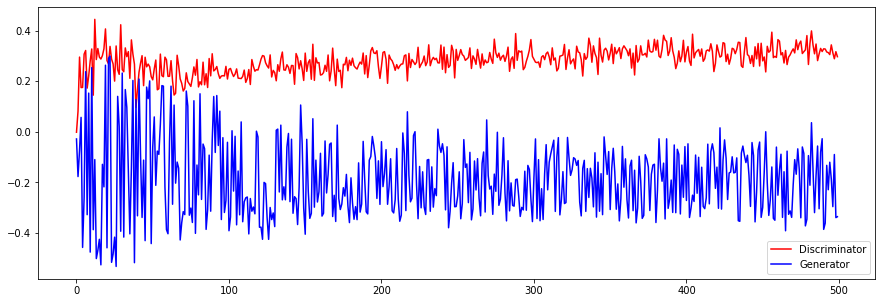

In [0]:
dat = pd.DataFrame({'d':d_losses, 'g':g_losses})
dat['epoch'] = np.arange(num_epochs)

fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(dat['epoch'], dat['d'], color='red', label='Discriminator')
ax.plot(dat['epoch'], dat['g'], color='blue', label='Generator')
ax.legend();

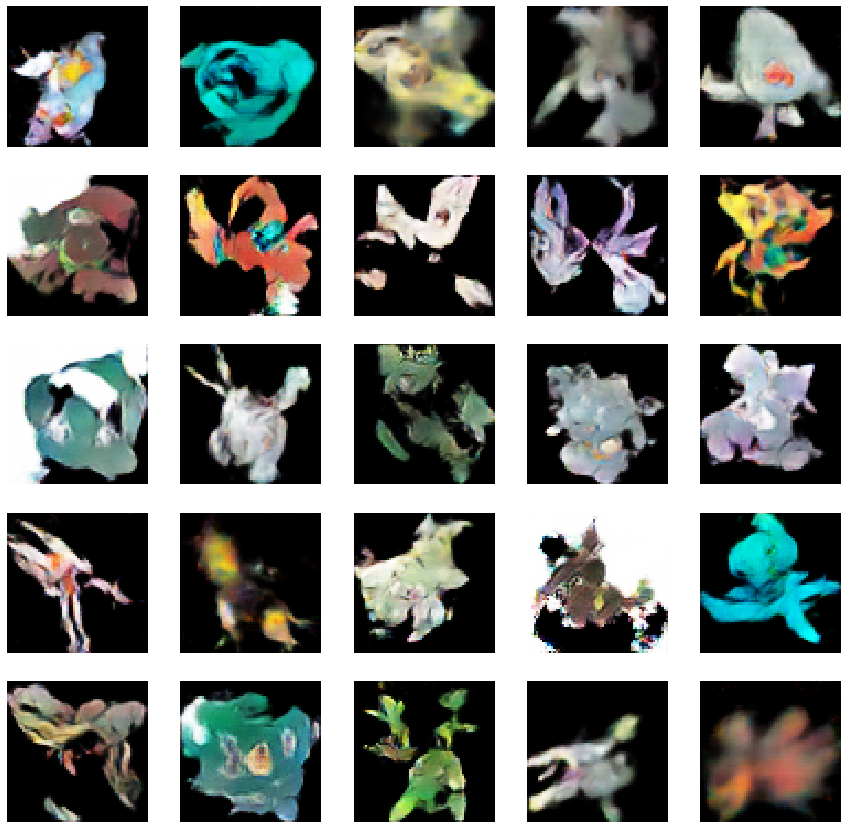

In [0]:
def image_grid_figure(sample, cols=5, rows=5, width=64, height=64, figsize=(15, 15), tags=None):
    fig, ax = plt.subplots(cols, rows, sharex='col', sharey='row', figsize=figsize)
    for i in range(cols):
        for j in range(rows):
            ax[i, j].imshow(tensor_to_img(sample[i * cols + j]), cmap='gray')
            # ax[i,j].imshow(sample[i * cols + j][0, :, :], cmap='gray')
            if tags is not None:
                ax[i, j].text(width // 2, -1.5, str(tags[i * cols + j]), ha='center')
            ax[i, j].axis('off')
    return fig

fake_digits = generator(noise(25)).data.cpu()
fig_grid = image_grid_figure(fake_digits)

In [0]:
# torch.save(generator, "r_wdeligan_64_700e_generator.pt")
# torch.save(discriminator, "r_wdeligan_64_700e_discriminator.pt")

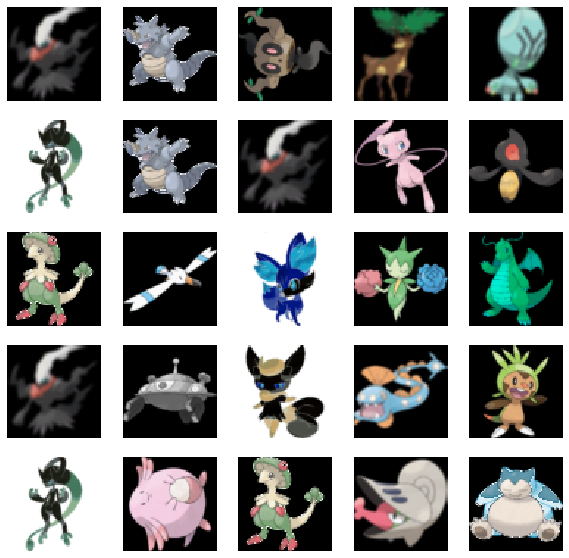

In [0]:
show(images_data[:100])